<br />

# Exploring Scotch Whiskies

## Business Analytics Practicum I

## 3rd Assignment


---

> Anastasios Theodorou, Student <br />
> Master of Science in Business Analytics <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> AM: p2822007


In [1]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
import requests

np.random.seed(42)
%matplotlib inline

### Q1 Score Prediction

Try to find a model to predict the score of schotch a whiskey based on the attributes collected by the authors. You can use any algorithm provided by scikit-learn. Evaluate how well your model performs.

* First, it was necessary to download the dataset from this link _[Link](http://adn.biol.umontreal.ca/~numericalecology/labo/Scotch/ScotchData.zip)_. Then we had to extract the data and use the 'scotch.xlsx' from the file 'Scotch data (Windows)' inside the zip file.

* After that, we created a dataframe containing all the data of scotch whiskeys. We had to mention that after executing the `read_excel` command, an error appears. This is refering to the extension that has our file, which is not recognized by the system. This error is probably caused from the difference between  mine personal computer's Windows Office version and that of the dataset's creator (back to 1996). Despite this error, the data has been inserted to `data` dataframe.

> <b> Preparing and Cleaning the Data </b>

In [2]:
data = pd.read_excel('scotch.xlsx', sheet_name='scotch.xls', header=[0,1])
print(data.shape)
data

(111, 85)


C:\Users\tasso\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
C:\Users\tasso\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:300: UserWarning: Unknown extension is not supported and will be removed


Unnamed: 0_level_0 Unnamed: 1_level_0 color                            \
                  NAME               NAME  wyne yellow v.pale pale p.gold   
0            Aberfeldy          Aberfeldy   0.0    1.0    0.0  0.0    0.0   
1             Aberlour           Aberlour   0.0    0.0    0.0  0.0    0.0   
2              Ardberg            Ardberg   0.0    0.0    0.0  0.0    0.0   
3              Ardmore            Ardmore   0.0    0.0    0.0  0.0    1.0   
4         Auchentoshan         Auchentosh   0.0    0.0    0.0  0.0    1.0   
..                 ...                ...   ...    ...    ...  ...    ...   
106          Tomintoul          Tomintoul   0.0    0.0    0.0  0.0    0.0   
107            Tormore            Tormore   0.0    0.0    0.0  0.0    0.0   
108       Tullibardine         Tullibardi   0.0    0.0    0.0  0.0    0.0   
109                NaN                NaN   NaN    NaN    NaN  NaN    NaN   
110                NaN                NaN   8.0    2.0    2.0  4.0   10.0   

                         ...      FIN                                        \
     gold o.gold f.gold  ... DISTRICT islay midland  spey  east west north    
0     0.0    0.0    0.0  ...  MIDLAND   0.0     1.0   0.0   0.0  0.0    0.0   
1     0.0    0.0    0.0  ...     SPEY   0.0     0.0   1.0   0.0  0.0    0.0   
2     0.0    0.0    0.0  ...    SOUTH   1.0     0.0   0.0   0.0  0.0    0.0   
3     0.0    0.0    0.0  ...     SPEY   0.0     0.0   1.0   0.0  0.0    0.0   
4     0.0    0.0    0.0  ...     WEST   0.0     0.0   0.0   0.0  0.0    0.0   
..    ...    ...    ...  ...      ...   ...     ...   ...   ...  ...    ...   
106   0.0    0.0    1.0  ...     SPEY   0.0     0.0   1.0   0.0  0.0    0.0   
107   0.0    0.0    1.0  ...     SPEY   0.0     0.0   1.0   0.0  0.0    0.0   
108   1.0    0.0    0.0  ...  MIDLAND   0.0     1.0   0.0   0.0  0.0    0.0   
109   NaN    NaN    NaN  ...      NaN   NaN     NaN   NaN   NaN  NaN    NaN   
110  21.0    2.0   27.0  ...      NaN   7.0     6.0  57.0  10.0  5.0    7.0   

                              
    lowland campbell islands  
0       0.0      0.0     0.0  
1       0.0      0.0     0.0  
2       0.0      0.0     0.0  
3       0.0      0.0     0.0  
4       1.0      0.0     0.0  
..      ...      ...     ...  
106     0.0      0.0     0.0  
107     0.0      0.0     0.0  
108     0.0      0.0     0.0  
109     NaN      NaN     NaN  
110     9.0      3.0     5.0  

[111 rows x 85 columns]

* Later, we created another dataframe containing the last 15 columns of the `data` dataframe. We saved them in the `reg` dataframe because these columns do not belong to one of the three categories (`color`, `body`, `finish`)

In [3]:
reg = data.iloc[:, -15:85]
reg.columns = reg.columns.droplevel(0)
reg

,AGE,DIST,SCORE,%,REGION,DISTRICT,islay,midland,spey,east,west,north,lowland,campbell,islands
0,-9.0,2.0,69.0,40.0,HIGH,MIDLAND,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12.0,4.0,83.0,43.0,HIGH,SPEY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.0,4.0,85.0,40.0,ISLAY,SOUTH,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18.0,2.0,66.0,46.0,HIGH,SPEY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10.0,5.0,85.0,40.0,LOW,WEST,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,12.0,3.0,76.0,40.0,HIGH,SPEY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
107,10.0,3.0,76.0,43.0,HIGH,SPEY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
108,10.0,3.0,76.0,40.0,HIGH,MIDLAND,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
regc = reg.columns
regc

Index(['AGE', 'DIST', 'SCORE', '%', 'REGION', 'DISTRICT', 'islay', 'midland',
       'spey', 'east', 'west', 'north ', 'lowland', 'campbell', 'islands'],
      dtype='object')

* Now, the `data` dataframe has the rest 71 columns. Here, we dropped the 1st column which was the same with the 2nd one.

In [5]:
data = data.iloc[:, 1:70]
data

Unnamed: 1_level_0 color                                                \
                  NAME  wyne yellow v.pale pale p.gold  gold o.gold f.gold   
0            Aberfeldy   0.0    1.0    0.0  0.0    0.0   0.0    0.0    0.0   
1             Aberlour   0.0    0.0    0.0  0.0    0.0   0.0    0.0    0.0   
2              Ardberg   0.0    0.0    0.0  0.0    0.0   0.0    0.0    0.0   
3              Ardmore   0.0    0.0    0.0  0.0    1.0   0.0    0.0    0.0   
4           Auchentosh   0.0    0.0    0.0  0.0    1.0   0.0    0.0    0.0   
..                 ...   ...    ...    ...  ...    ...   ...    ...    ...   
106          Tomintoul   0.0    0.0    0.0  0.0    0.0   0.0    0.0    1.0   
107            Tormore   0.0    0.0    0.0  0.0    0.0   0.0    0.0    1.0   
108         Tullibardi   0.0    0.0    0.0  0.0    0.0   1.0    0.0    0.0   
109                NaN   NaN    NaN    NaN  NaN    NaN   NaN    NaN    NaN   
110                NaN   8.0    2.0    2.0  4.0   10.0  21.0    2.0   27.0   

            ...   FIN                                                     
    bronze  ... smoke sweet spice  oil salt arome  ling  long very quick  
0      0.0  ...   0.0   0.0   1.0  0.0  0.0   0.0   0.0   0.0  0.0   0.0  
1      0.0  ...   0.0   0.0   0.0  0.0  0.0   0.0   1.0   0.0  0.0   0.0  
2      0.0  ...   0.0   0.0   0.0  0.0  1.0   0.0   0.0   0.0  0.0   0.0  
3      0.0  ...   0.0   0.0   0.0  0.0  0.0   0.0   0.0   0.0  0.0   0.0  
4      0.0  ...   0.0   0.0   1.0  0.0  0.0   0.0   0.0   0.0  0.0   0.0  
..     ...  ...   ...   ...   ...  ...  ...   ...   ...   ...  ...   ...  
106    0.0  ...   0.0   0.0   0.0  0.0  0.0   0.0   0.0   1.0  0.0   0.0  
107    0.0  ...   0.0   0.0   0.0  0.0  0.0   0.0   0.0   0.0  1.0   0.0  
108    0.0  ...   0.0   1.0   0.0  0.0  0.0   1.0   0.0   0.0  0.0   0.0  
109    NaN  ...   NaN   NaN   NaN  NaN  NaN   NaN   NaN   NaN  NaN   NaN  
110    5.0  ...  21.0  18.0  14.0  6.0  8.0   7.0  11.0  24.0  4.0   6.0  

[111 rows x 69 columns]

* Merge the two headers in one.

In [6]:
data.columns = data.columns.map('_'.join)
data.rename(columns={ data.columns[0]: "Name" }, inplace = True)
data

,Name,color_wyne,color_yellow,color_v.pale,color_pale,color_p.gold,color_gold,color_o.gold,color_f.gold,color_bronze,...,FIN_smoke,FIN_sweet,FIN_spice,FIN_oil,FIN_salt,FIN_arome,FIN_ling,FIN_long,FIN_very,FIN_quick
0,Aberfeldy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aberlour,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Ardberg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Ardmore,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Auchentosh,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Tomintoul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
107,Tormore,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
108,Tullibardi,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Place the `reg` dataframe next to the `data` dataframe.

In [7]:
data = pd.concat([data, reg], axis=1)
data

,Name,color_wyne,color_yellow,color_v.pale,color_pale,color_p.gold,color_gold,color_o.gold,color_f.gold,color_bronze,...,DISTRICT,islay,midland,spey,east,west,north,lowland,campbell,islands
0,Aberfeldy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,MIDLAND,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aberlour,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,SPEY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Ardberg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,SOUTH,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ardmore,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,SPEY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Auchentosh,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,WEST,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Tomintoul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,SPEY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
107,Tormore,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,SPEY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
108,Tullibardi,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,MIDLAND,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
pd.set_option('display.max_columns', None)
data.drop(data.tail(2).index,inplace=True) # drop last 2 rows
data = data.drop(['%'], axis=1)
data = data.drop(['AGE'], axis=1)

print(data.shape)
data

(109, 82)


,Name,color_wyne,color_yellow,color_v.pale,color_pale,color_p.gold,color_gold,color_o.gold,color_f.gold,color_bronze,color_p.amber,color_amber,color_f.amber,color_red,color_sherry,NOSE_AROMA,NOSE_PEAT,NOSE_SWEET,NOSE_LIGHT,NOSE_FRESH,NOSE_DRY,NOSE_FRUIT,NOSE_GRASS,NOSE_SEA,NOSE_SHERRY,NOSE_SPICY,NOSE_RICH,BODY_soft,BODY_med,BODY_full,BODY_round,BODY_smooth,BODY_light,BODY_firm,BODY_oily,PAL_full,PAL_dry,PAL_sherry,PAL_big,PAL_light,PAL_smooth,PAL_clean,PAL_fruit,PAL_grass,PAL_smoke,PAL_sweet,PAL_spice,PAL_oil,PAL_salt,PAL_arome,FIN_full,FIN_dry,FIN_warm,FIN_big,FIN_light,FIN_smooth,FIN_clean,FIN_fruit,FIN_grass,FIN_smoke,FIN_sweet,FIN_spice,FIN_oil,FIN_salt,FIN_arome,FIN_ling,FIN_long,FIN_very,FIN_quick,DIST,SCORE,REGION,DISTRICT,islay,midland,spey,east,west,north,lowland,campbell,islands
0,Aberfeldy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,69.0,HIGH,MIDLAND,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aberlour,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,83.0,HIGH,SPEY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Ardberg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,85.0,ISLAY,SOUTH,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ardmore,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,66.0,HIGH,SPEY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Auchentosh,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,85.0,LOW,WEST,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Tobermory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,67.0,HIGH,MULL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
105,Tomatin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,75.0,HIGH,SPEY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
106,Tomintoul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,76.0,HIGH,SPEY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
107,Tormore,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,

In [9]:
cols=[i for i in data.columns if i not in ["Name","REGION","DISTRICT"]]
for col in cols:
    data[col]= data[col].astype('int64')
data

,Name,color_wyne,color_yellow,color_v.pale,color_pale,color_p.gold,color_gold,color_o.gold,color_f.gold,color_bronze,color_p.amber,color_amber,color_f.amber,color_red,color_sherry,NOSE_AROMA,NOSE_PEAT,NOSE_SWEET,NOSE_LIGHT,NOSE_FRESH,NOSE_DRY,NOSE_FRUIT,NOSE_GRASS,NOSE_SEA,NOSE_SHERRY,NOSE_SPICY,NOSE_RICH,BODY_soft,BODY_med,BODY_full,BODY_round,BODY_smooth,BODY_light,BODY_firm,BODY_oily,PAL_full,PAL_dry,PAL_sherry,PAL_big,PAL_light,PAL_smooth,PAL_clean,PAL_fruit,PAL_grass,PAL_smoke,PAL_sweet,PAL_spice,PAL_oil,PAL_salt,PAL_arome,FIN_full,FIN_dry,FIN_warm,FIN_big,FIN_light,FIN_smooth,FIN_clean,FIN_fruit,FIN_grass,FIN_smoke,FIN_sweet,FIN_spice,FIN_oil,FIN_salt,FIN_arome,FIN_ling,FIN_long,FIN_very,FIN_quick,DIST,SCORE,REGION,DISTRICT,islay,midland,spey,east,west,north,lowland,campbell,islands
0,Aberfeldy,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,2,69,HIGH,MIDLAND,0,1,0,0,0,0,0,0,0
1,Aberlour,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,4,83,HIGH,SPEY,0,0,1,0,0,0,0,0,0
2,Ardberg,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,85,ISLAY,SOUTH,1,0,0,0,0,0,0,0,0
3,Ardmore,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,66,HIGH,SPEY,0,0,1,0,0,0,0,0,0
4,Auchentosh,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5,85,LOW,WEST,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Tobermory,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,67,HIGH,MULL,0,0,0,0,0,0,0,0,1
105,Tomatin,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,75,HIGH,SPEY,0,0,1,0,0,0,0,0,0
106,Tomintoul,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,76,HIGH,SPEY,0,0,1,0,0,0,0,0,0
107,Tormore,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,3,76,HIGH,SPEY,0,0,1,0,0,0,0,0,0


* In order to insert the data and take the wanted form, we had to drop the last 2 rows that contained either no data or some useless data, we had to delete the 2nd column that was the same with the 1st, the column named `%` (no reason to exist, neither the bibliography refers to its meaning) and the `AGE` column (as the bibliography indicates this variable is not used in the analysis proper, because it contains some negative values which are not explained anywhere). Finally, we had to convert nearly all the columns to integers because by definition they were binary data. 

In [10]:
scores = data.iloc[:, 1:71]
scores.head()

,color_wyne,color_yellow,color_v.pale,color_pale,color_p.gold,color_gold,color_o.gold,color_f.gold,color_bronze,color_p.amber,color_amber,color_f.amber,color_red,color_sherry,NOSE_AROMA,NOSE_PEAT,NOSE_SWEET,NOSE_LIGHT,NOSE_FRESH,NOSE_DRY,NOSE_FRUIT,NOSE_GRASS,NOSE_SEA,NOSE_SHERRY,NOSE_SPICY,NOSE_RICH,BODY_soft,BODY_med,BODY_full,BODY_round,BODY_smooth,BODY_light,BODY_firm,BODY_oily,PAL_full,PAL_dry,PAL_sherry,PAL_big,PAL_light,PAL_smooth,PAL_clean,PAL_fruit,PAL_grass,PAL_smoke,PAL_sweet,PAL_spice,PAL_oil,PAL_salt,PAL_arome,FIN_full,FIN_dry,FIN_warm,FIN_big,FIN_light,FIN_smooth,FIN_clean,FIN_fruit,FIN_grass,FIN_smoke,FIN_sweet,FIN_spice,FIN_oil,FIN_salt,FIN_arome,FIN_ling,FIN_long,FIN_very,FIN_quick,DIST,SCORE
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,2,69
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,4,83
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,85
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,66
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5,85


> <b> Create the Model </b>

* We create the `train` and `test` set in order to create a model (with `train` set) and later evaluate it through `test` set.

* The training set contains the 75% of the observations and the test set the rest 25%.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scores.iloc[:, 0:71], scores.iloc[:, -1],
                                                    test_size=0.25, random_state=42)
print(X_train.shape, y_train.shape)

(81, 70) (81,)


In [12]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [13]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf

DecisionTreeClassifier()

* Now, we 're going to check how much depth our decision tree will have. This is happenning with the help of k-fold cross validation using 10 folds.

In [14]:
from sklearn.model_selection import cross_val_score, KFold

from scipy.stats import sem

all_depths = []
all_mean_scores = []

for max_depth in range(1, 16):
    all_depths.append(max_depth)
    simple_tree = DecisionTreeRegressor(max_depth=max_depth)
    cv = KFold(n_splits=10, shuffle=True, random_state=13)
    sc = cross_val_score(simple_tree, X_train, y_train, cv=cv)
    mean_score = np.mean(sc)
    all_mean_scores.append(np.mean(sc))
    print("max_depth = ", max_depth, sc, mean_score, sem(sc))

max_depth =  1 [ 0.58682176  0.74601188  0.30817774  0.65464474 -0.11371129 -0.3045819
  0.66011643  0.65442311  0.63495099  0.49755945] 0.4324412901294554 0.11425234856989092
max_depth =  2 [0.95462603 0.92520265 0.78427795 0.94766559 0.74169461 0.77912517
 0.92385853 0.931114   0.95878969 0.86236453] 0.880871876040346 0.02618422222326732
max_depth =  3 [0.97841051 0.9734345  0.94423768 0.98292787 0.90337695 0.94055571
 0.99132147 0.9890159  0.98812901 0.96221395] 0.9653623558695414 0.00895009150187868
max_depth =  4 [0.99224543 0.97566276 0.98802267 0.99606344 0.96470756 0.99679827
 0.99447425 0.995035   0.99150298 0.98846634] 0.9882978703152112 0.0032629337174224795
max_depth =  5 [0.99871287 0.98580327 0.98267565 0.99555385 0.95897436 1.
 0.99857875 0.99670876 0.99253731 0.98610508] 0.9895649899301627 0.003914257024608218
max_depth =  6 [0.99752475 0.9791395  0.98460058 0.99692189 0.95076923 1.
 1.         0.99772145 0.97761194 0.98610508] 0.9870394425831582 0.004866321956180929
ma

* For maximum depth 15 we can observe that after 6 the model does not do better fitting. The differrences are minor between them. 

* This result can also be extracted with the help of the below plot. This plot depicts the mean score for every depth of our model. The mean score shows us how good the partition is.

Text(0, 0.5, 'mean score')

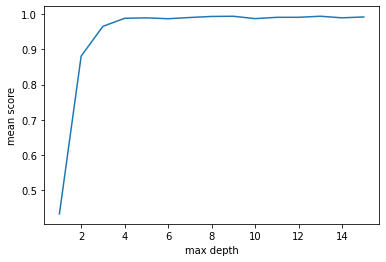

In [15]:
plt.plot(all_depths, all_mean_scores, label='True y')
plt.xlabel('max depth')
plt.ylabel('mean score')

* Now, we can see a peak when the tree has up to 5 leaves.

In [92]:
from sklearn.model_selection import GridSearchCV

parameters = [{'max_depth': list(range(1, 16))},]

cv = KFold(n_splits=8, shuffle=True, random_state=13)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)

clf = clf.fit(X_train, y_train)
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(max_depth=6)
{'max_depth': 6}


* With `GridSearchCV` the above procedure were done by the system. Also, it confirms our initial assumptions.

14.327112937282427 1
2.7707261982115785 2
0.6541838134430726 3
0.1382716049382716 4
0.021164021164021166 5
0.0 6
0.0 7
0.0 8
0.0 9
0.0 10
0.0 11
0.0 12
0.0 13
0.0 14
0.0 15


Text(0, 0.5, 'mse')

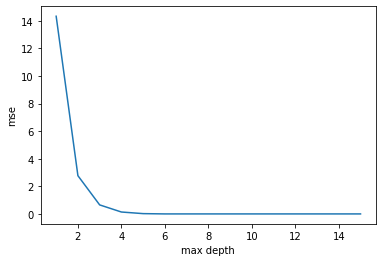

In [17]:
from sklearn.metrics import mean_squared_error

all_depths = []
all_mses = []

for max_depth in range(1, 16):
    all_depths.append(max_depth)
    simple_tree = DecisionTreeRegressor(max_depth=max_depth)
    simple_tree.fit(X_train, y_train)
    y_pred  = simple_tree.predict(X_train)
    mse = mean_squared_error(y_train, y_pred)
    all_mses.append(np.mean(mse))
    print(mse, max_depth)

plt.plot(all_depths, all_mses, label='True y')
plt.xlabel('max depth')
plt.ylabel('mse')

* One last step before plot our final decision tree is the above diagram. Here, we plot for every different depth of our tree the Mean Square Error (MSE). We can infer that after the 6th out of 15 iterations, the MSE does not change. To be more clear and in the 5th depth the MSE is nearly 0 as well.

* Because of the fact that the smaller MSE, the better our model is, we select as maximum depth to have 5 leaves. After that depth, our model is probably overfits and the final result may be not as accurate as with less number of leaves.

In [18]:
sc_tree = DecisionTreeRegressor(max_depth=5)

sc_tree.fit(X_train.loc[:, 'color_wyne':'DIST'], X_train['SCORE'])

DecisionTreeRegressor(max_depth=5)

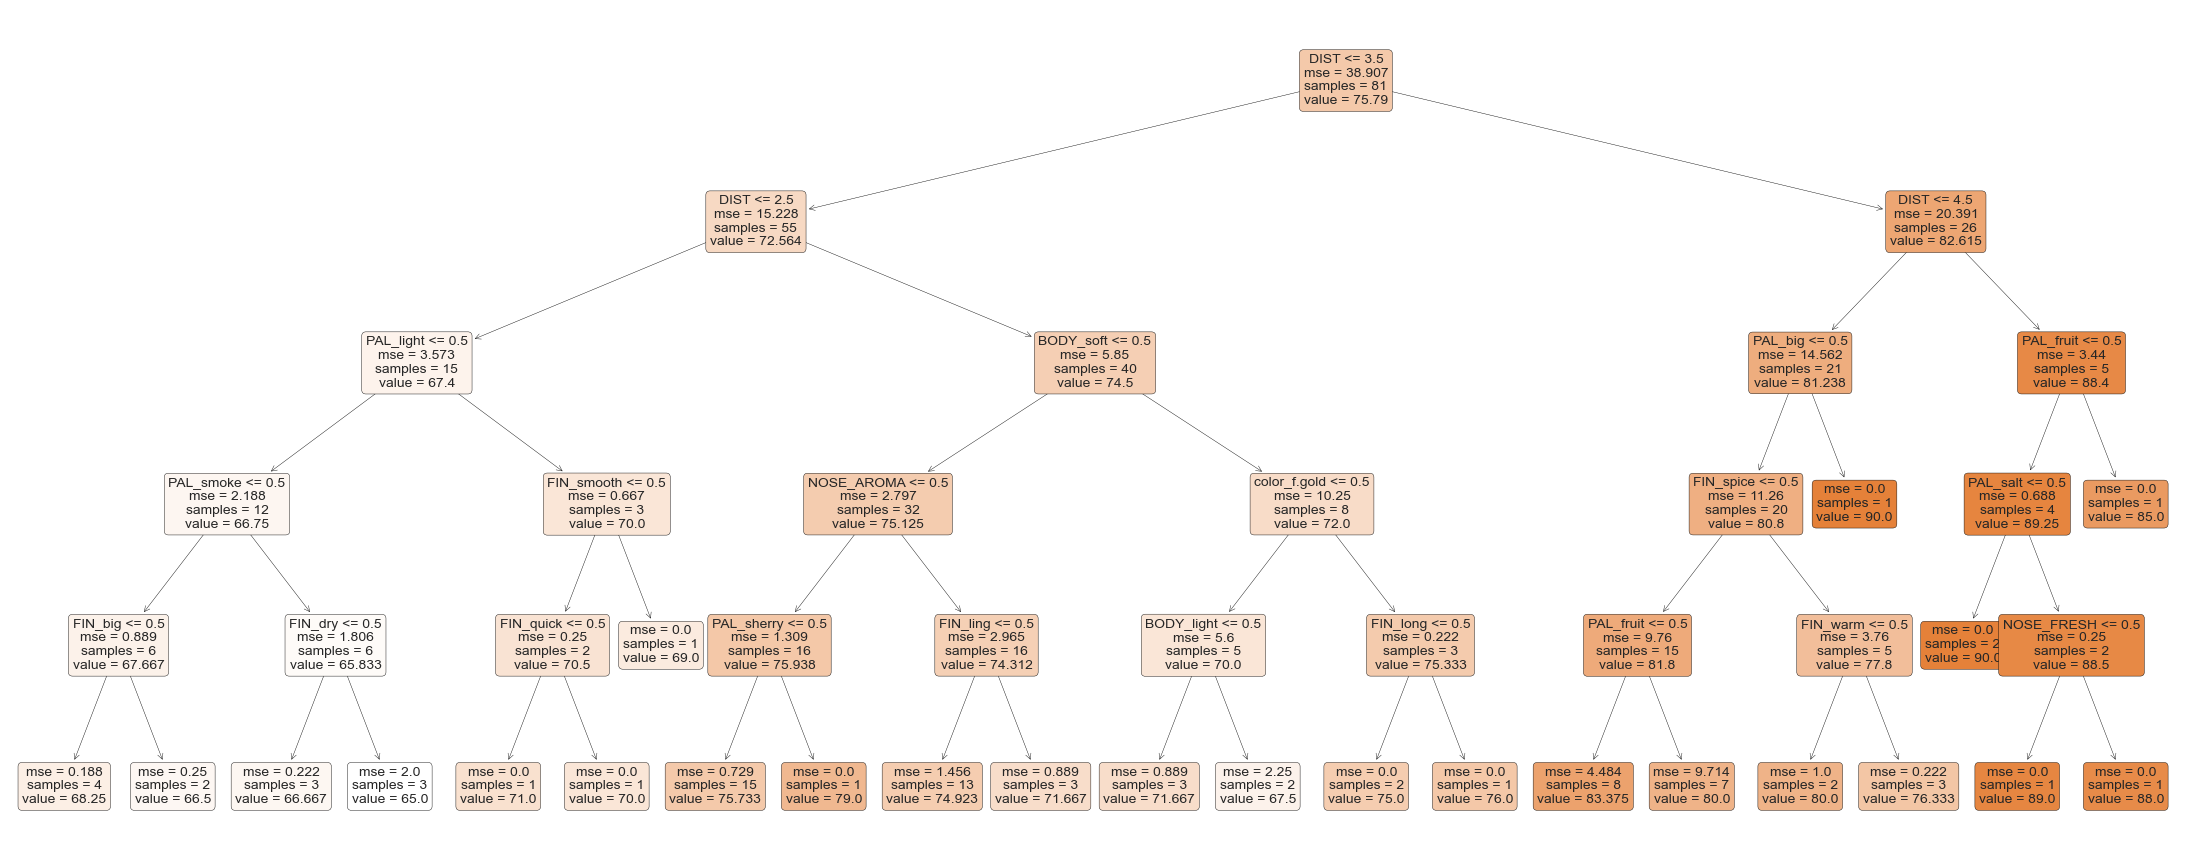

In [101]:
plt.figure(figsize=(28, 11))
_ = tree.plot_tree(sc_tree,
                   feature_names=X_train.columns[:-1],
                   filled=True, rounded=True, fontsize=10)

In general, the system selected this tree based on the MSE and from the larger MSE it goes to the smallest.

The variables in each box mean:
1. mse = mean square error - MSE indicates how homogenious the data is and how effective the partitioning of the data is. When `mse = 0` then this part/section is perfect.
2. samples = the dataset in each question
3. value = the mean value of the samples that contained in the data

* <b> Interpretation </b>

This decision tree shows that (in the right of every node is the `False` answer and on the left the `True` one):
1.  The mean score of 2 observations would be 90 if the whisky has not round body or palate aroma and the distillery would have 5 score (has the best quality in its products).  
2. Also, 90 score will have if an whisky has the big palate and the score of the distillery would be 4.
3. The minimum 65 score will have an whisky that has dry finish, smoky and not light palate and the distillery that produces it has score 1 or 2 (very poor overall quality of its products). 

Respectivelly we can draw conclusions for every box we see in the above tree.

> <b> Evaluation </b>

* Because here we have a regression tree, we used for evaluation the $R^2$, the MSE and the Mean Absolute Error (MAE).

* $R^2$ is an indicator showing how good is our tree for prediction. The higher, the better. It is calculated with the `score()`.

* As we said before MSE measures the average of the squares of the errors. In other words, it shows the average squared difference between the estimated values and the actual values.

* Finally, MAE calculates the errors between paired observations expressing the same phenomenon and presents how much deviation we have in our estimates. 

In [20]:
from sklearn.metrics import mean_absolute_error

pred_tree = sc_tree.predict(X_test.loc[:, 'color_wyne':'DIST'])
print('MAE:', round(mean_absolute_error(pred_tree, y_test),2))

MAE: 3.66


In [21]:
print('R^2:', round(sc_tree.score(X_test.loc[:, 'color_wyne':'DIST'], y_test),2))

R^2: 0.58


In [22]:
print('Count:', len(scores['SCORE']),
      'Mean: ', round(np.mean(scores['SCORE']),2),
      'Median: ', round(np.median(scores['SCORE']),2),
      'STD: ', round(np.std(scores['SCORE']),2))

Count: 109 Mean:  75.59 Median:  76.0 STD:  6.92


* We can observe that MAE is pretty low, which means that the prediction scores are only 3.66 points away from their actual values.

* Also, the R-squared, which depicts how much variability can be explained by the model is 58%. This shows a model which is neither good nor bad. 

* In general, the above regression tree indicates a fair model.

* Now, we will use an essembe method and specifically `Boosting`, in order to improove our model taking into consideration the outliers. Here, we create `30` independent trees and have regressions that are slightly better than random guessing. With boosting we improove the regression training weak predictors on the original dataset.

In [23]:
from sklearn.ensemble import AdaBoostRegressor

rgr = AdaBoostRegressor(sc_tree, n_estimators=30)
rgr.fit(X_train, y_train)
print("R^2: ", round(rgr.score(X_test, y_test),2))

R^2:  0.93


In [24]:
predicted = rgr.predict(X_test)
print("MAE: ", round(mean_absolute_error(predicted, y_test),2))

MAE:  0.75


* We can see how the $R^2$ increased and from 58% have gone 93% (nearly perfect fitting) and the MAE dicreased from `3.66` to `0.75` referring to lower difference between predicted and actual scores.

* Now, with the help of the above `AdaBoostRegressor` we can see the importance of each feature. In our case, beacause we have a lot of different variables we took only the 10 more important features.

In [25]:
rgr.fit(scores.loc[:, 'color_wyne':'DIST'], scores['SCORE'])

importances = rgr.feature_importances_

std = np.std([tree.feature_importances_ for tree in rgr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
indices = indices[0:10]

for f in range(0,10):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], 
                                      scores.columns[indices[f]], 
                                      importances[indices[f]]))

1. feature 68 DIST (0.772592)
2. feature 25 NOSE_RICH (0.024937)
3. feature 11 color_f.amber (0.016580)
4. feature 41 PAL_fruit (0.015551)
5. feature 14 NOSE_AROMA (0.010373)
6. feature 0 color_wyne (0.009907)
7. feature 48 PAL_arome (0.009333)
8. feature 52 FIN_big (0.007965)
9. feature 51 FIN_warm (0.007571)
10. feature 26 BODY_soft (0.007258)


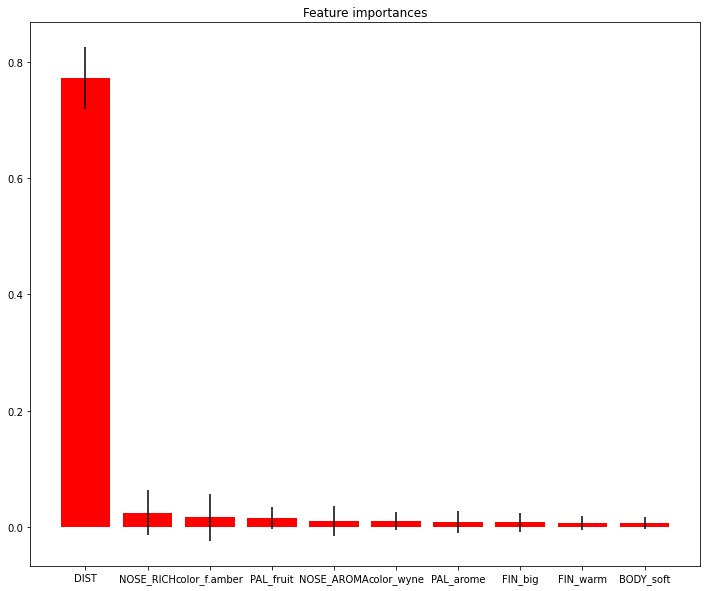

In [26]:
# Plot the feature importances of the forest
plt.figure(figsize=(12, 10))
plt.title("Feature importances")
plt.bar(range(0,10), importances[indices],
        tick_label=[scores.columns[x] for x in indices],
        color="r", yerr=std[indices], align="center")
plt.show()

* We can see that the most important feature for evaluating the score of scotch whiskeys is the score that each distillery has. In comparison with the rest of the variables, this feature contributes 77% in predicting the whiskeys' score. The rest of the features take minor role in the regression and this is because the majority of them are binary data, so they do not take big values. We have to remind that our dataset is mainly consists of characteristics which mean that all of them have nearly the same gravity on evaluating each whisky.

### Q2 PCA

Perform a PCA analysis on the data to reduce the number of dimensions.

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

> <b> Preparing the Data </b>

* After importing the appropriate libraries, we ceate the dataframe with the wanted columns. This dataframe contains all the numeric columns of the initial one and also it places the names of each whisky as index.

In [28]:
cols=[i for i in data.columns if i not in ["REGION","DISTRICT"]]
data2= data[cols]
data2 = data2.set_index('Name')
data2

,color_wyne,color_yellow,color_v.pale,color_pale,color_p.gold,color_gold,color_o.gold,color_f.gold,color_bronze,color_p.amber,color_amber,color_f.amber,color_red,color_sherry,NOSE_AROMA,NOSE_PEAT,NOSE_SWEET,NOSE_LIGHT,NOSE_FRESH,NOSE_DRY,NOSE_FRUIT,NOSE_GRASS,NOSE_SEA,NOSE_SHERRY,NOSE_SPICY,NOSE_RICH,BODY_soft,BODY_med,BODY_full,BODY_round,BODY_smooth,BODY_light,BODY_firm,BODY_oily,PAL_full,PAL_dry,PAL_sherry,PAL_big,PAL_light,PAL_smooth,PAL_clean,PAL_fruit,PAL_grass,PAL_smoke,PAL_sweet,PAL_spice,PAL_oil,PAL_salt,PAL_arome,FIN_full,FIN_dry,FIN_warm,FIN_big,FIN_light,FIN_smooth,FIN_clean,FIN_fruit,FIN_grass,FIN_smoke,FIN_sweet,FIN_spice,FIN_oil,FIN_salt,FIN_arome,FIN_ling,FIN_long,FIN_very,FIN_quick,DIST,SCORE,islay,midland,spey,east,west,north,lowland,campbell,islands
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aberfeldy,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,2,69,0,1,0,0,0,0,0,0,0
Aberlour,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,4,83,0,0,1,0,0,0,0,0,0
Ardberg,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,85,1,0,0,0,0,0,0,0,0
Ardmore,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,66,0,0,1,0,0,0,0,0,0
Auchentosh,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5,85,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tobermory,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,67,0,0,0,0,0,0,0,0,1
Tomatin,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,75,0,0,1,0,0,0,0,0,0
Tomintoul,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,76,0,0,1,0,0,0,0,0,0


* Later, we put the column `SCORE`, the dependent variable, as first column in order to do more easily the computations.

In [29]:
first_column = data2.pop('SCORE')
# insert column using 'insert(position, column_name, first_column)'' function
data2.insert(0, 'SCORE', first_column)
data2.sort_values(by='SCORE')

,SCORE,color_wyne,color_yellow,color_v.pale,color_pale,color_p.gold,color_gold,color_o.gold,color_f.gold,color_bronze,color_p.amber,color_amber,color_f.amber,color_red,color_sherry,NOSE_AROMA,NOSE_PEAT,NOSE_SWEET,NOSE_LIGHT,NOSE_FRESH,NOSE_DRY,NOSE_FRUIT,NOSE_GRASS,NOSE_SEA,NOSE_SHERRY,NOSE_SPICY,NOSE_RICH,BODY_soft,BODY_med,BODY_full,BODY_round,BODY_smooth,BODY_light,BODY_firm,BODY_oily,PAL_full,PAL_dry,PAL_sherry,PAL_big,PAL_light,PAL_smooth,PAL_clean,PAL_fruit,PAL_grass,PAL_smoke,PAL_sweet,PAL_spice,PAL_oil,PAL_salt,PAL_arome,FIN_full,FIN_dry,FIN_warm,FIN_big,FIN_light,FIN_smooth,FIN_clean,FIN_fruit,FIN_grass,FIN_smoke,FIN_sweet,FIN_spice,FIN_oil,FIN_salt,FIN_arome,FIN_ling,FIN_long,FIN_very,FIN_quick,DIST,islay,midland,spey,east,west,north,lowland,campbell,islands
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ben Nevis,55,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
Ladyburn,57,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0
Glen Keith,64,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,1,0,0,0,0,0,0
Glen Mhor,64,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,1,0,0,0,0,0,0
North Port,64,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lagavulin,89,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,5,1,0,0,0,0,0,0,0,0
Longrow,90,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,5,0,0,0,0,0,0,0,1,0
Highland P,90,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1


* A description of our final dataframe:

In [30]:
data2.describe()

,SCORE,color_wyne,color_yellow,color_v.pale,color_pale,color_p.gold,color_gold,color_o.gold,color_f.gold,color_bronze,color_p.amber,color_amber,color_f.amber,color_red,color_sherry,NOSE_AROMA,NOSE_PEAT,NOSE_SWEET,NOSE_LIGHT,NOSE_FRESH,NOSE_DRY,NOSE_FRUIT,NOSE_GRASS,NOSE_SEA,NOSE_SHERRY,NOSE_SPICY,NOSE_RICH,BODY_soft,BODY_med,BODY_full,BODY_round,BODY_smooth,BODY_light,BODY_firm,BODY_oily,PAL_full,PAL_dry,PAL_sherry,PAL_big,PAL_light,PAL_smooth,PAL_clean,PAL_fruit,PAL_grass,PAL_smoke,PAL_sweet,PAL_spice,PAL_oil,PAL_salt,PAL_arome,FIN_full,FIN_dry,FIN_warm,FIN_big,FIN_light,FIN_smooth,FIN_clean,FIN_fruit,FIN_grass,FIN_smoke,FIN_sweet,FIN_spice,FIN_oil,FIN_salt,FIN_arome,FIN_ling,FIN_long,FIN_very,FIN_quick,DIST,islay,midland,spey,east,west,north,lowland,campbell,islands
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,75.587156,0.073394,0.018349,0.018349,0.036697,0.091743,0.192661,0.018349,0.247706,0.045872,0.036697,0.137615,0.036697,0.036697,0.009174,0.376147,0.486239,0.412844,0.128440,0.174312,0.348624,0.293578,0.256881,0.192661,0.266055,0.045872,0.155963,0.192661,0.614679,0.229358,0.119266,0.403670,0.495413,0.256881,0.165138,0.155963,0.394495,0.091743,0.064220,0.128440,0.119266,0.137615,0.357798,0.183486,0.293578,0.752294,0.211009,0.064220,0.110092,0.100917,0.064220,0.376147,0.174312,0.137615,0.082569,0.110092,0.073394,0.110092,0.082569,0.192661,0.165138,0.128440,0.055046,0.073394,0.064220,0.100917,0.220183,0.036697,0.055046,3.192661,0.064220,0.055046,0.522936,0.091743,0.045872,0.064220,0.082569,0.027523,0.045872
std,6.947170,0.261987,0.134829,0.134829,0.188886,0.289996,0.396210,0.134829,0.433674,0.210173,0.188886,0.346086,0.188886,0.188886,0.095783,0.486655,0.502119,0.494619,0.336125,0.381130,0.478736,0.457504,0.438931,0.396210,0.443934,0.210173,0.364496,0.396210,0.488919,0.422362,0.325598,0.492899,0.502288,0.438931,0.373020,0.364496,0.491000,0.289996,0.246277,0.336125,0.325598,0.346086,0.481566,0.388852,0.457504,0.433674,0.409910,0.246277,0.314450,0.302611,0.246277,0.486655,0.381130,0.346086,0.276501,0.314450,0.261987,0.314450,0.276501,0.396210,0.373020,0.336125,0.229123,0.261987,0.246277,0.302611,0.416284,0.188886,0.229123,0.855019,0.246277,0.229123,0.501781,0.289996,0.210173,0.246277,0.276501,0.164357,0.210173
min,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

* We specify the dependent and independent variables (`data2_Y` and `data2_X` respectively).

In [31]:
data2_Y = data2[data2.columns[0]]
data2_Y.head()

Name
Aberfeldy     69
Aberlour      83
Ardberg       85
Ardmore       66
Auchentosh    85
Name: SCORE, dtype: int64

In [32]:
data2_X = data2[data2.columns[1:len(data2)]]
data2_X.head()

,color_wyne,color_yellow,color_v.pale,color_pale,color_p.gold,color_gold,color_o.gold,color_f.gold,color_bronze,color_p.amber,color_amber,color_f.amber,color_red,color_sherry,NOSE_AROMA,NOSE_PEAT,NOSE_SWEET,NOSE_LIGHT,NOSE_FRESH,NOSE_DRY,NOSE_FRUIT,NOSE_GRASS,NOSE_SEA,NOSE_SHERRY,NOSE_SPICY,NOSE_RICH,BODY_soft,BODY_med,BODY_full,BODY_round,BODY_smooth,BODY_light,BODY_firm,BODY_oily,PAL_full,PAL_dry,PAL_sherry,PAL_big,PAL_light,PAL_smooth,PAL_clean,PAL_fruit,PAL_grass,PAL_smoke,PAL_sweet,PAL_spice,PAL_oil,PAL_salt,PAL_arome,FIN_full,FIN_dry,FIN_warm,FIN_big,FIN_light,FIN_smooth,FIN_clean,FIN_fruit,FIN_grass,FIN_smoke,FIN_sweet,FIN_spice,FIN_oil,FIN_salt,FIN_arome,FIN_ling,FIN_long,FIN_very,FIN_quick,DIST,islay,midland,spey,east,west,north,lowland,campbell,islands
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aberfeldy,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0
Aberlour,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,4,0,0,1,0,0,0,0,0,0
Ardberg,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,1,0,0,0,0,0,0,0,0
Ardmore,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0
Auchentosh,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0


* We convert the above dataframe into numpy array so as to use it in the PC analysis.

In [33]:
data_array = data2_X.to_numpy()
data_array.shape

(109, 78)

> <b> Principal Component Analysis (PCA) </b>

* It is worth to mention the below useful information about PCA:
    1. The idea of PCA is to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.
    
    2. The number of principal components is less than the original number of variables.
    
    3. The principal components capture, in decreasing order, the variance exhibited by the original variables.

* So, first, we test a large number of components (dimensions/variables), in order to see how many of them can explain in a satisfying way our data without loosing much information. Then, we plot our results to observe better our findings.

In [34]:
n_components=50

pca = PCA(n_components=n_components)
pca.fit(data_array)

PCA(n_components=50)

Text(0.5, 0.85, '90% cut-off threshold')

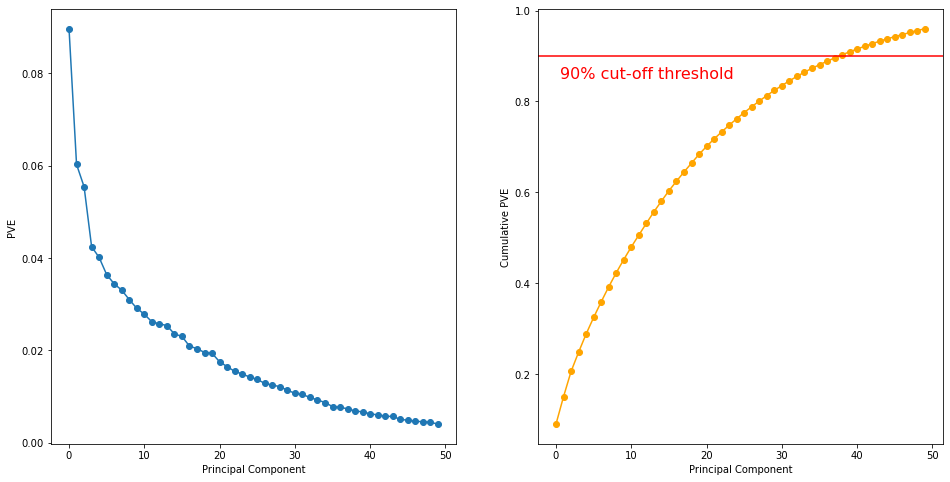

In [35]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('PVE')
plt.subplot(1, 2, 2)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='orange')
plt.xlabel('Principal Component')
_ = plt.ylabel('Cumulative PVE')

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)

In [36]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.08968265 0.060261   0.05544246 0.04244548 0.04010494 0.03638411
 0.03438393 0.03302714 0.03097259 0.02908578 0.02780953 0.02616122
 0.02572802 0.02534194 0.02352212 0.02300215 0.02088573 0.02035278
 0.01950572 0.01933422 0.0174964  0.01644228 0.01542185 0.01486252
 0.01418345 0.01368255 0.01279939 0.01246672 0.01209983 0.01135921
 0.01064808 0.01041927 0.00976178 0.00923599 0.00866847 0.00778674
 0.00764957 0.00729684 0.00683772 0.00664067 0.00620921 0.0059903
 0.0057075  0.00563936 0.00502091 0.00482756 0.00459377 0.00451506
 0.00436788 0.00400667]
0.9600710798551704


In [37]:
pca = PCA(n_components=40)
pca.fit(data_array)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.08968265 0.060261   0.05544246 0.04244548 0.04010494 0.03638411
 0.03438393 0.03302714 0.03097259 0.02908578 0.02780953 0.02616122
 0.02572802 0.02534194 0.02352212 0.02300215 0.02088573 0.02035278
 0.01950572 0.01933422 0.0174964  0.01644228 0.01542185 0.01486252
 0.01418345 0.01368255 0.01279939 0.01246672 0.01209983 0.01135921
 0.01064808 0.01041927 0.00976178 0.00923599 0.00866847 0.00778674
 0.00764957 0.00729684 0.00683772 0.00664067]
0.9091928672093152


In [38]:
sorted_loadings = (-np.abs(pca.components_)).argsort()[0]
sorted_loadings

array([68, 19, 22, 31, 25, 17, 16, 28, 65, 10, 71, 62, 47, 14,  7, 53, 27,
       23, 60, 34, 20, 76, 69, 44, 26, 63, 73, 45, 50, 35, 18, 74, 15, 32,
       52,  3, 30, 38,  9,  8, 67, 46, 41, 48, 77, 51, 72,  0, 42, 24, 29,
       64, 12, 54, 55, 58, 11, 39, 75, 57, 66, 70, 21, 13, 37, 33, 61, 43,
        6, 56,  1,  4,  2, 49,  5, 36, 40, 59], dtype=int64)

In [39]:
data2.columns[sorted_loadings[:5]]

Index(['FIN_quick', 'NOSE_FRESH', 'NOSE_GRASS', 'BODY_smooth', 'NOSE_SPICY'], dtype='object')

In [40]:
sorted_loadings = (-np.abs(pca.components_)).argsort()[1]
sorted_loadings

array([31, 27, 15, 21, 28,  7, 43, 18, 42, 35, 58, 32, 71, 23, 16, 34, 50,
       44, 22,  4, 45, 25, 75,  5, 19,  0, 54, 72, 26, 51, 20, 24,  9, 36,
       53, 14, 30, 40, 39, 46, 69, 33, 65, 70, 29,  3, 47, 62, 55, 68, 10,
       49, 12, 48, 76,  2, 77, 61, 74, 17,  1, 59, 73, 56,  8, 57, 52, 37,
       38, 64, 66, 11, 60, 41,  6, 13, 63, 67], dtype=int64)

In [41]:
data2.columns[sorted_loadings[:5]]

Index(['BODY_smooth', 'BODY_soft', 'NOSE_AROMA', 'NOSE_FRUIT', 'BODY_med'], dtype='object')

* By definition, the first principal component is the most important because it captures more variance than any other component, the second is less important than the other one etc. As the plots indicate we can observe that with 50 principal components (PC) the variance of the full model being explained is 96%. The plots depict the Proportion of Variance Explained (PVE). More specifically, in the left plot we can see how much variance is being explained with the addition of one more PC and in the right plot we observe the cumulative PVE. If we draw a line at the 90% of the PVE we conclude that it corresponds to nearly 40 PC.


* Also, in the above analysis we can see what are the most important features in each of the components, focusing to the first two PC. For the first principal component the five most important variables are:
        `'FIN_quick', 'NOSE_FRESH', 'NOSE_GRASS', 'BODY_smooth', 'NOSE_SPICY'`
    and in the second:
        `'BODY_smooth', 'BODY_soft', 'NOSE_AROMA', 'NOSE_FRUIT', 'BODY_med'`

* In order to vizualize the above results we create a biplot to see how much each of the original features contributes to each principal component. In the referring biplot the principal components are depicted in the left and bottom axes and the contributions of the original features to the components are shown to the right and top axes.

In [42]:
from math import ceil

# based on https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot
def biplot(score, coeff, text, labels=None):
    fig = plt.figure(figsize=(10, 8))
    ax1 = fig.add_subplot(111, label='pcas')
    ax2 = fig.add_subplot(111, label='loading vectors', frame_on=False)
    ax2.xaxis.tick_top()
    ax2.yaxis.tick_right()    
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]

    # draw scatterplot
    ax1.scatter(xs, ys, fc='k')
    for i, txt in enumerate(text):
        ax1.text(xs[i] + 0.05, ys[i], txt,
                    fontsize=12,
                    alpha=0.75,
                    c='blue')
    
    # draw loading vectors
    for i in range(n):
        ax2.arrow(0, 0, coeff[i,0] * 0.85, coeff[i,1] * 0.85, 
                  lw=1,
                  color = 'r',alpha = 0.5, head_width=0.025, head_length=0.025)
        if labels is None:
            ax2.text(coeff[i,0], coeff[i,1], "Var"+str(i+1), 
                     color = 'g', ha = 'center', va = 'center')
        else:
            ax2.text(coeff[i,0], coeff[i,1], 
                     labels[i], color = 'brown', ha = 'center', va = 'center',
                     fontsize=14)
    
    xmax = max(xs.min(), xs.max(), key=abs)
    xlim = 0.5 * ceil(2.0 * xmax)
    ax1.set_xlim(-xlim, xlim)
    ymax = max(ys.min(), ys.max(), key=abs)
    ylim = 0.5 * ceil(2.0 * ymax)
    ax1.set_ylim(-ylim, ylim)
    ax1.axhline(0, linestyle=':', color='k', lw=0.5) # horizontal lines
    ax1.axvline(0, linestyle=':', color='k', lw=0.5) # vertical lines
    ax1.set_xlabel("PC1")
    ax1.set_ylabel("PC2")
    ax2.set_xlim(-1, 1)
    ax2.set_ylim(-1, 1)

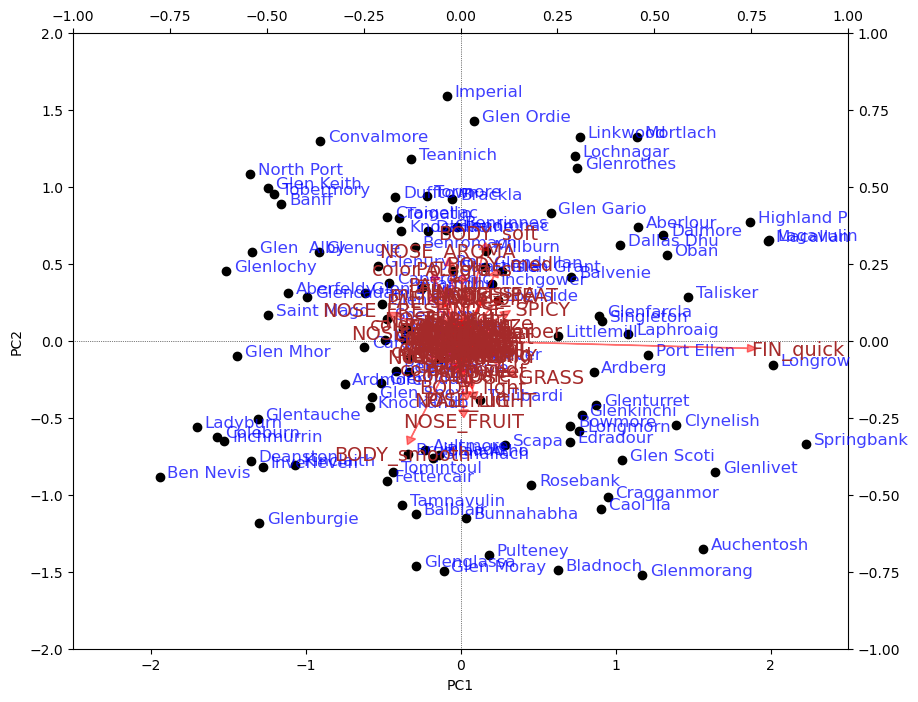

In [43]:
X_proj = pca.fit_transform(data_array)

plt.style.use('default')

biplot(X_proj,
       pca.components_.T,
       data2.index,
       data2.columns)

* This biplot is referring to only 2 PC. We know that with only 2 PC, the variance explained is very low, but we plot it anyway so as to see what features contribute in each one of them. From a first look we can assume that none of the whiskeys charactristics contribute more in one component than in the other one. The differences are minor. But, we can conclude that the whiskeys characteristics that are being distinguished are:
    1. the `FIN_quick` which gives nearly 0.75 to the first component and nearly 0 to the second one,
    2. the `NOSE_FRUIT` gives nearly 0 to the first component and nearly -0.25 to the second one,
    3. the `BODY_smooth` gives nearly -0.2 to the first component, nearly -0.35 to the second one and it is linearly correlated with the previous one (their angle is less than 90 degrees), 
    4. the `BODY_soft` gives nearly 0 to the first component and nearly 0.3 to the second one and 
    5. the `NOSE_AROMA` gives nearly 0 to the first component, nearly 0.25 to the second one and it is linearly correlated with the previous one.


* We have to mention, that scaling, which equalize every variable to have the same measure, is not nessecary in our case, because our data consist mainly of binary and discrete variables. The only feature that should worry us is the `DIST` variable, that shows the score of each distillery and takes values from 1 to 5. These values are discrete and they are referring to scores and we chose not to scale it because its mean and variance did not differ a lot from the other features.

* Now, we will perform PCA with 20 PC and later classification using the Gaussian Naive Bayes classifier. This classifier is based on probabilities and on applying Bayes' theorem with strong (naïve) independence assumptions between the features (see _[Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Gaussian_naive_Bayes)_ for more infomation).

* We use this technique in both scaling and unscaling data in order to justify our previous option of not using scaling for this specific dataset.

In [44]:
unscaled_clf = make_pipeline(PCA(n_components=20), GaussianNB())
unscaled_clf.fit(data2_X, data2_Y)
pred_test = unscaled_clf.predict(data2_X)

print(f'Prediction accuracy: {metrics.accuracy_score(data2_Y, pred_test):.2%}')

Prediction accuracy: 89.91%


In [45]:
std_clf = make_pipeline(StandardScaler(), PCA(n_components=20), GaussianNB())
std_clf.fit(data2_X, data2_Y)
pred_test_std = std_clf.predict(data2_X)

print(f'Prediction accuracy: {metrics.accuracy_score(data2_Y, pred_test_std):.2%}')

Prediction accuracy: 87.16%


* Here, we can see that after scaling the prediction of our model does not get better. In the contrary, it is getting worse.

In [46]:
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']
pca = std_clf.named_steps['pca']
X_train_transformed = pca.transform(data2_X)
scaler = std_clf.named_steps['standardscaler']
X_train_std_transformed = pca_std.transform(scaler.transform(data2_X))

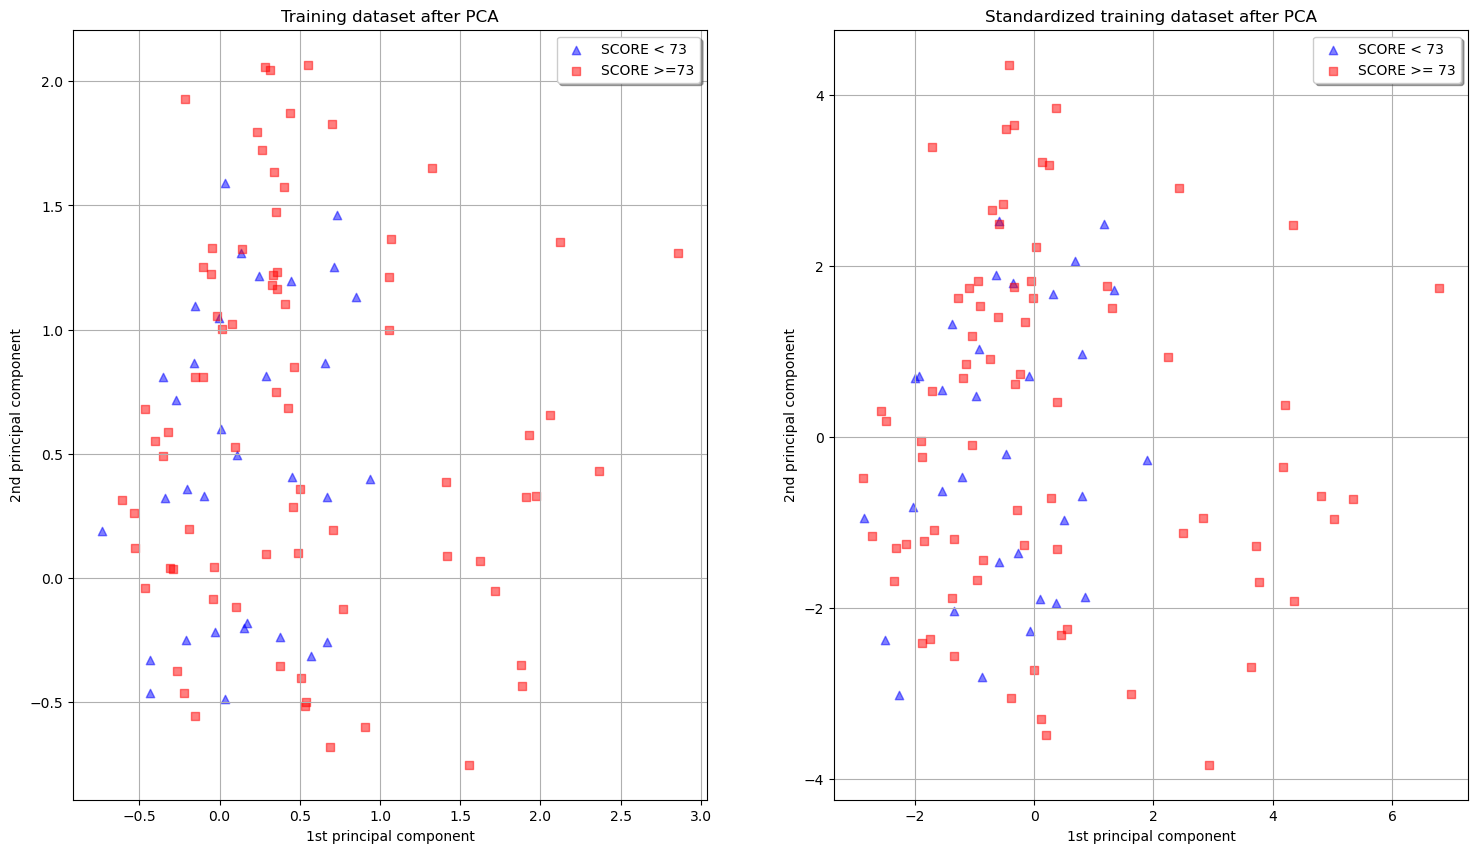

In [47]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,10))

ax1.scatter(X_train_transformed[data2_Y < 73 , 0],
    X_train_transformed[data2_Y < 73, 1],
    color='blue',
    label='%s' % 'SCORE < 73',
    alpha=0.5,
    marker='^')
   
ax1.scatter(X_train_transformed[data2_Y >= 73 , 0],
    X_train_transformed[data2_Y >= 73, 1],
    color='red',
    label="SCORE >=73",
    alpha=0.5,
    marker='s')

ax2.scatter(X_train_std_transformed[data2_Y < 73 , 0],
    X_train_std_transformed[data2_Y < 73, 1],
    color='blue',
    label='SCORE < 73',
    alpha=0.5,
    marker='^')

ax2.scatter(X_train_std_transformed[data2_Y>= 73, 0],
    X_train_std_transformed[data2_Y >= 73, 1],
    color='red',
    label='SCORE >= 73',
    alpha=0.5,
    marker='s')

ax1.set_title('Training dataset after PCA')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right', shadow=True)
    ax.grid()

* In the above plots, we see an effort to vizualize the PCA. That is why, we used the `unscaled` and the `scaled` dataset to see the differences between them. Also, we split the dependent variable into two categories, one reffering to `SCORES < 73` and the other to `SCORES >= 73`. We chose this value, because it is in the middle of our Y variable (it takes values from 55 to 90). Again these plots are not much representative to the truth, because they can depict only 2 PC and in the fact we need up to 20 PC. Each principal component means one different dimension in the screen. So, 20 PC cannot be vizualized.

* That is why, because of the low PVE, both the left and right plot do not discretize in a satisfying way the dependent variable.  

<b> Finally, after the principal component analysis and in order to answer the initial question of reducing the dimensions of the dataset, we can infer that with more than 30 components (more than 80% PVE) the whiskeys scores can be explained quite well. </b>

### Q3 Clustering without Geographical Information

Carry out clustering on the data, without taking into account the geographical information (regions, districts, geographical coordinates). You can use any [clustering algorithm provided by scikit-learn](http://scikit-learn.org/stable/modules/clustering.html) that you deem suitable. Remember that as we have stressed repeatedly in class, one of the advantages of scikit-learn is that it presents a uniform interface; so if you know how to use it for some cases, you should have no problem using it on new situations. The result should be a number of clusters based on the whiskey characteristics. Describe the groups, list the whiskeys in each group, and the best whiskey of each group, based on its score. You can also check how close your groups are to those found by the authors.

* In order to perform clustering we had to trasform our dataframe. So, we followed the same procedure as we did above.

In [48]:
data = data.set_index('Name')

first_column = data.pop('SCORE')
  
data.insert(0, 'SCORE', first_column)
data

,SCORE,color_wyne,color_yellow,color_v.pale,color_pale,color_p.gold,color_gold,color_o.gold,color_f.gold,color_bronze,color_p.amber,color_amber,color_f.amber,color_red,color_sherry,NOSE_AROMA,NOSE_PEAT,NOSE_SWEET,NOSE_LIGHT,NOSE_FRESH,NOSE_DRY,NOSE_FRUIT,NOSE_GRASS,NOSE_SEA,NOSE_SHERRY,NOSE_SPICY,NOSE_RICH,BODY_soft,BODY_med,BODY_full,BODY_round,BODY_smooth,BODY_light,BODY_firm,BODY_oily,PAL_full,PAL_dry,PAL_sherry,PAL_big,PAL_light,PAL_smooth,PAL_clean,PAL_fruit,PAL_grass,PAL_smoke,PAL_sweet,PAL_spice,PAL_oil,PAL_salt,PAL_arome,FIN_full,FIN_dry,FIN_warm,FIN_big,FIN_light,FIN_smooth,FIN_clean,FIN_fruit,FIN_grass,FIN_smoke,FIN_sweet,FIN_spice,FIN_oil,FIN_salt,FIN_arome,FIN_ling,FIN_long,FIN_very,FIN_quick,DIST,REGION,DISTRICT,islay,midland,spey,east,west,north,lowland,campbell,islands
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aberfeldy,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,2,HIGH,MIDLAND,0,1,0,0,0,0,0,0,0
Aberlour,83,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,4,HIGH,SPEY,0,0,1,0,0,0,0,0,0
Ardberg,85,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,ISLAY,SOUTH,1,0,0,0,0,0,0,0,0
Ardmore,66,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,HIGH,SPEY,0,0,1,0,0,0,0,0,0
Auchentosh,85,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5,LOW,WEST,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tobermory,67,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,HIGH,MULL,0,0,0,0,0,0,0,0,1
Tomatin,75,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,HIGH,SPEY,0,0,1,0,0,0,0,0,0
Tomintoul,76,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,HIGH,SPEY,0,0,1,0,0,0,0,0,0


* We keep on a new dataframe named `clust_data` the columns we want (all except from geographical ones).

In [49]:
clust_data = data.iloc[:, 0:70]
print(clust_data.shape)
clust_data.head()

(109, 70)


,SCORE,color_wyne,color_yellow,color_v.pale,color_pale,color_p.gold,color_gold,color_o.gold,color_f.gold,color_bronze,color_p.amber,color_amber,color_f.amber,color_red,color_sherry,NOSE_AROMA,NOSE_PEAT,NOSE_SWEET,NOSE_LIGHT,NOSE_FRESH,NOSE_DRY,NOSE_FRUIT,NOSE_GRASS,NOSE_SEA,NOSE_SHERRY,NOSE_SPICY,NOSE_RICH,BODY_soft,BODY_med,BODY_full,BODY_round,BODY_smooth,BODY_light,BODY_firm,BODY_oily,PAL_full,PAL_dry,PAL_sherry,PAL_big,PAL_light,PAL_smooth,PAL_clean,PAL_fruit,PAL_grass,PAL_smoke,PAL_sweet,PAL_spice,PAL_oil,PAL_salt,PAL_arome,FIN_full,FIN_dry,FIN_warm,FIN_big,FIN_light,FIN_smooth,FIN_clean,FIN_fruit,FIN_grass,FIN_smoke,FIN_sweet,FIN_spice,FIN_oil,FIN_salt,FIN_arome,FIN_ling,FIN_long,FIN_very,FIN_quick,DIST
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aberfeldy,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,2
Aberlour,83,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,4
Ardberg,85,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4
Ardmore,66,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
Auchentosh,85,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5


* Convert the dataframe to an array, so as we can use it for future computations.

In [50]:
clust_array = clust_data.to_numpy()
clust_array.shape

(109, 70)

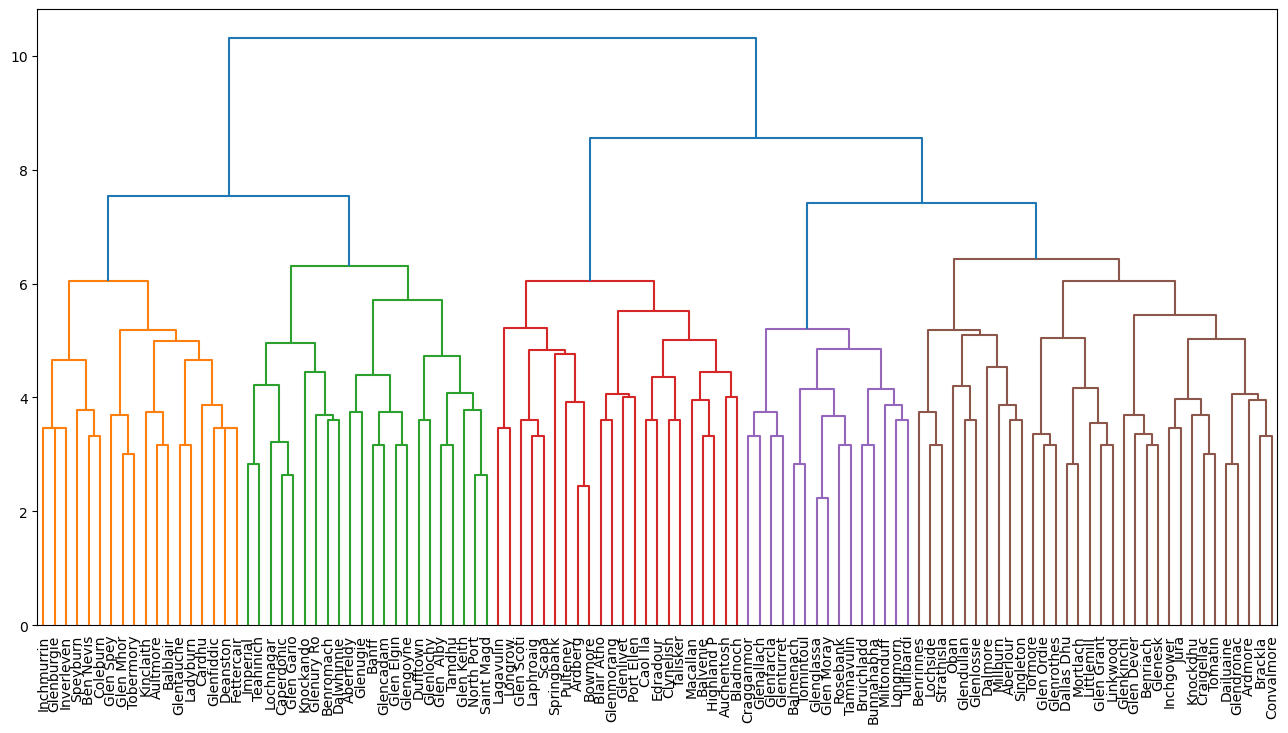

In [51]:
from scipy.cluster.hierarchy import dendrogram, linkage

model = linkage(clust_array[:, 1:70], 'ward')
plt.figure(figsize=(16, 8))
_ = dendrogram(model, orientation='top', labels=list(clust_data.index), leaf_font_size=10, leaf_rotation='vertical')

* The above dendrogram shows how the clustering has been made using the "Ward" linkage and the default "Euclidean" distance. After executing this code we observe that it created five (5) clusters (where the distance between the leaves of the dendrogram is higher), as it was expected, because we have five main categories of the whiskeys characteristics (color, nose, body, palate, finish). We can also see the name of each whiskey in the x-axis and how they were distributed across each cluster.


* Later, we create a dataframe based on the above clustering, so as to analyze the content of each cluster.

In [52]:
from scipy.cluster.hierarchy import fcluster

hc_labels = fcluster(model, 5, criterion='maxclust')

cluster_scores = pd.DataFrame({'scores': clust_data['SCORE'], 'cluster': hc_labels})
cluster_scores

,scores,cluster
Name,,
Aberfeldy,69,2
Aberlour,83,5
Ardberg,85,3
Ardmore,66,5
Auchentosh,85,3
...,...,...
Tobermory,67,1
Tomatin,75,5
Tomintoul,76,4


In [53]:
cluster_scores.pivot_table(index='cluster', columns='scores', aggfunc='size').fillna(0).astype('int64')

scores,55,57,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,83,85,86,87,88,89,90
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,0,3,1,2,0,3,1,1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2,0,1,2,1,1,2,2,0,1,1,3,4,1,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,1,1,3,0,6,1,1,1,1,3
4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,8,2,0,0,0,0,0,1,1,0,0,0,1
5,0,0,0,0,2,0,1,1,0,2,1,1,1,6,6,1,1,3,1,1,3,1,0,0,0,0,0


* After pivoting the above `cluster_scores` dataframe, we see how the scores are distributed across the clusters. We can observe that there is not big discretization among them. The only conclusions that we can draw is the following:
    1. the first cluster contains mainly low values (55 to 76 score)
    2. the second contains values from 64 to 80 
    3. the third cluster consists of big values (from 75 to 90)
    4. the fourth has a variety of scores with the most records containing in it has 76 score (8 in total)
    5. the fifth cluster contains more whiskeys than the other four and the scores of them are between 66 to 85.

In [54]:
cluster1 = pd.merge(clust_data, cluster_scores[cluster_scores["cluster"]==1], left_index=True, right_index=True).iloc[:, 0:70]
print(cluster1.shape)
cluster1.head()

(18, 70)


,SCORE,color_wyne,color_yellow,color_v.pale,color_pale,color_p.gold,color_gold,color_o.gold,color_f.gold,color_bronze,color_p.amber,color_amber,color_f.amber,color_red,color_sherry,NOSE_AROMA,NOSE_PEAT,NOSE_SWEET,NOSE_LIGHT,NOSE_FRESH,NOSE_DRY,NOSE_FRUIT,NOSE_GRASS,NOSE_SEA,NOSE_SHERRY,NOSE_SPICY,NOSE_RICH,BODY_soft,BODY_med,BODY_full,BODY_round,BODY_smooth,BODY_light,BODY_firm,BODY_oily,PAL_full,PAL_dry,PAL_sherry,PAL_big,PAL_light,PAL_smooth,PAL_clean,PAL_fruit,PAL_grass,PAL_smoke,PAL_sweet,PAL_spice,PAL_oil,PAL_salt,PAL_arome,FIN_full,FIN_dry,FIN_warm,FIN_big,FIN_light,FIN_smooth,FIN_clean,FIN_fruit,FIN_grass,FIN_smoke,FIN_sweet,FIN_spice,FIN_oil,FIN_salt,FIN_arome,FIN_ling,FIN_long,FIN_very,FIN_quick,DIST
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aultmore,75,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
Balblair,76,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,3
Ben Nevis,55,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
Cardhu,72,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,3
Coleburn,67,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2


In [55]:
cluster2 = pd.merge(clust_data, cluster_scores[cluster_scores["cluster"]==2], left_index=True, right_index=True).iloc[:, 0:70]
print(cluster2.shape)
cluster2.head()

(22, 70)


,SCORE,color_wyne,color_yellow,color_v.pale,color_pale,color_p.gold,color_gold,color_o.gold,color_f.gold,color_bronze,color_p.amber,color_amber,color_f.amber,color_red,color_sherry,NOSE_AROMA,NOSE_PEAT,NOSE_SWEET,NOSE_LIGHT,NOSE_FRESH,NOSE_DRY,NOSE_FRUIT,NOSE_GRASS,NOSE_SEA,NOSE_SHERRY,NOSE_SPICY,NOSE_RICH,BODY_soft,BODY_med,BODY_full,BODY_round,BODY_smooth,BODY_light,BODY_firm,BODY_oily,PAL_full,PAL_dry,PAL_sherry,PAL_big,PAL_light,PAL_smooth,PAL_clean,PAL_fruit,PAL_grass,PAL_smoke,PAL_sweet,PAL_spice,PAL_oil,PAL_salt,PAL_arome,FIN_full,FIN_dry,FIN_warm,FIN_big,FIN_light,FIN_smooth,FIN_clean,FIN_fruit,FIN_grass,FIN_smoke,FIN_sweet,FIN_spice,FIN_oil,FIN_salt,FIN_arome,FIN_ling,FIN_long,FIN_very,FIN_quick,DIST
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aberfeldy,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,2
Banff,66,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2
Benromach,75,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,3
Caperdonic,73,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,3
Dalwhinnie,76,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3


In [56]:
cluster3 = pd.merge(clust_data, cluster_scores[cluster_scores["cluster"]==3], left_index=True, right_index=True).iloc[:, 0:70]
print(cluster3.shape)
cluster3.head()

(22, 70)


,SCORE,color_wyne,color_yellow,color_v.pale,color_pale,color_p.gold,color_gold,color_o.gold,color_f.gold,color_bronze,color_p.amber,color_amber,color_f.amber,color_red,color_sherry,NOSE_AROMA,NOSE_PEAT,NOSE_SWEET,NOSE_LIGHT,NOSE_FRESH,NOSE_DRY,NOSE_FRUIT,NOSE_GRASS,NOSE_SEA,NOSE_SHERRY,NOSE_SPICY,NOSE_RICH,BODY_soft,BODY_med,BODY_full,BODY_round,BODY_smooth,BODY_light,BODY_firm,BODY_oily,PAL_full,PAL_dry,PAL_sherry,PAL_big,PAL_light,PAL_smooth,PAL_clean,PAL_fruit,PAL_grass,PAL_smoke,PAL_sweet,PAL_spice,PAL_oil,PAL_salt,PAL_arome,FIN_full,FIN_dry,FIN_warm,FIN_big,FIN_light,FIN_smooth,FIN_clean,FIN_fruit,FIN_grass,FIN_smoke,FIN_sweet,FIN_spice,FIN_oil,FIN_salt,FIN_arome,FIN_ling,FIN_long,FIN_very,FIN_quick,DIST
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ardberg,85,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4
Auchentosh,85,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5
Balvenie,85,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,4
Bladnoch,85,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4
Blair Atho,75,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,3


In [57]:
cluster4 = pd.merge(clust_data, cluster_scores[cluster_scores["cluster"]==4], left_index=True, right_index=True).iloc[:, 0:70]
print(cluster4.shape)
cluster4.head()

(15, 70)


,SCORE,color_wyne,color_yellow,color_v.pale,color_pale,color_p.gold,color_gold,color_o.gold,color_f.gold,color_bronze,color_p.amber,color_amber,color_f.amber,color_red,color_sherry,NOSE_AROMA,NOSE_PEAT,NOSE_SWEET,NOSE_LIGHT,NOSE_FRESH,NOSE_DRY,NOSE_FRUIT,NOSE_GRASS,NOSE_SEA,NOSE_SHERRY,NOSE_SPICY,NOSE_RICH,BODY_soft,BODY_med,BODY_full,BODY_round,BODY_smooth,BODY_light,BODY_firm,BODY_oily,PAL_full,PAL_dry,PAL_sherry,PAL_big,PAL_light,PAL_smooth,PAL_clean,PAL_fruit,PAL_grass,PAL_smoke,PAL_sweet,PAL_spice,PAL_oil,PAL_salt,PAL_arome,FIN_full,FIN_dry,FIN_warm,FIN_big,FIN_light,FIN_smooth,FIN_clean,FIN_fruit,FIN_grass,FIN_smoke,FIN_sweet,FIN_spice,FIN_oil,FIN_salt,FIN_arome,FIN_ling,FIN_long,FIN_very,FIN_quick,DIST
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Balmenach,69,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3
Bruichladd,76,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
Bunnahabha,77,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
Cragganmor,90,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4
Glenallach,76,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,3


In [58]:
cluster5 = pd.merge(clust_data, cluster_scores[cluster_scores["cluster"]==5], left_index=True, right_index=True).iloc[:, 0:70]
print(cluster5.shape)
cluster5.head()

(32, 70)


,SCORE,color_wyne,color_yellow,color_v.pale,color_pale,color_p.gold,color_gold,color_o.gold,color_f.gold,color_bronze,color_p.amber,color_amber,color_f.amber,color_red,color_sherry,NOSE_AROMA,NOSE_PEAT,NOSE_SWEET,NOSE_LIGHT,NOSE_FRESH,NOSE_DRY,NOSE_FRUIT,NOSE_GRASS,NOSE_SEA,NOSE_SHERRY,NOSE_SPICY,NOSE_RICH,BODY_soft,BODY_med,BODY_full,BODY_round,BODY_smooth,BODY_light,BODY_firm,BODY_oily,PAL_full,PAL_dry,PAL_sherry,PAL_big,PAL_light,PAL_smooth,PAL_clean,PAL_fruit,PAL_grass,PAL_smoke,PAL_sweet,PAL_spice,PAL_oil,PAL_salt,PAL_arome,FIN_full,FIN_dry,FIN_warm,FIN_big,FIN_light,FIN_smooth,FIN_clean,FIN_fruit,FIN_grass,FIN_smoke,FIN_sweet,FIN_spice,FIN_oil,FIN_salt,FIN_arome,FIN_ling,FIN_long,FIN_very,FIN_quick,DIST
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aberlour,83,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,4
Ardmore,66,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
Benriach,69,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3
Benrinnes,78,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3
Brackla,77,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3


In [59]:
for i, j in zip((cluster1, cluster2, cluster3, cluster4, cluster5), range(1,6)):
    print('- Cluster No',j, 'means: \n', i.mean()[i.mean()>0.5])
    print()

- Cluster No 1 means: 
 SCORE         68.444444
NOSE_FRUIT     0.555556
BODY_light     0.777778
PAL_fruit      0.666667
PAL_sweet      0.666667
DIST           2.333333
dtype: float64

- Cluster No 2 means: 
 SCORE           71.818182
color_f.gold     0.545455
NOSE_PEAT        1.000000
BODY_med         0.863636
PAL_smoke        0.636364
PAL_sweet        0.909091
DIST             2.681818
dtype: float64

- Cluster No 3 means: 
 SCORE        83.500000
NOSE_SEA      0.636364
BODY_med      0.590909
PAL_sweet     0.681818
DIST          4.181818
dtype: float64

- Cluster No 4 means: 
 SCORE          77.800000
NOSE_GRASS      0.600000
BODY_smooth     0.733333
BODY_light      0.666667
BODY_firm       0.733333
PAL_grass       0.533333
PAL_sweet       0.533333
DIST            3.333333
dtype: float64

- Cluster No 5 means: 
 SCORE         75.71875
NOSE_SWEET     0.75000
BODY_med       0.87500
PAL_dry        0.53125
PAL_sweet      0.84375
DIST           3.28125
dtype: float64



* From the above analysis we can observe, the whiskeys that are contained in each cluster with their characteristics,  and later the means of each characteristics that are above `0.5` value. We performed this specific computation in order to see the contents of each cluster and what features prevail over the others. We observe that between 1-2 and 4-5 clusters the distillery score is nearly the same. The third cluster contains mainly those whiskeys that come from distilleries with very high score. 

* Also, we can observe that the `PAL_sweet` characteristic is common between all the clusters and especially in cluster 2 and 5 the majority of whiskeys have this feature. Moreover, another interesting finding is that the clustering did not been performed based on whiskeys colors, because only in the 2nd cluster the majority of them has golden color. In the other clusters there is not a specific color, which overwhelms the others.

In [60]:
for i, j in zip((cluster1, cluster2, cluster3, cluster4, cluster5), range(1,6)):
    print(f"- Cluster No{j} size: {i.shape}")
    print(f"- Whiskeys names: {i.index.values}")
    print('- Best whiskeys in group No', j, ': ', i[i["SCORE"]==i["SCORE"].max()].index.values,
         ', with score: "', i["SCORE"].max(), '"', sep = '')
    print()    

- Cluster No1 size: (18, 70)
- Whiskeys names: ['Aultmore' 'Balblair' 'Ben Nevis' 'Cardhu' 'Coleburn' 'Deanston'
 'Fettercair' 'Glenburgie' 'Glenfiddic' 'Glen Mhor' 'Glen Spey'
 'Glentauche' 'Inchmurrin' 'Inverleven' 'Kinclaith' 'Ladyburn' 'Speyburn'
 'Tobermory']
- Best whiskeys in group No1: ['Balblair'], with score: "76"

- Cluster No2 size: (22, 70)
- Whiskeys names: ['Aberfeldy' 'Banff' 'Benromach' 'Caperdonic' 'Dalwhinnie' 'Dufftown'
 'Glen  Alby' 'Glencadam' 'Glen Elgin' 'Glen Gario' 'Glengoyne'
 'Glen Keith' 'Glenlochy' 'Glenugie' 'Glenury Ro' 'Imperial' 'Knockando'
 'Lochnagar' 'North Port' 'Saint Magd' 'Tamdhu' 'Teaninich']
- Best whiskeys in group No2: ['Lochnagar'], with score: "80"

- Cluster No3 size: (22, 70)
- Whiskeys names: ['Ardberg' 'Auchentosh' 'Balvenie' 'Bladnoch' 'Blair Atho' 'Bowmore'
 'Caol Ila' 'Clynelish' 'Edradour' 'Glenlivet' 'Glenmorang' 'Glen Scoti'
 'Highland P' 'Lagavulin' 'Laphroaig' 'Macallan' 'Port Ellen' 'Pulteney'
 'Scapa' 'Springbank' 'Longrow' '

* In the above analysis we can see the size of each cluster, the whiskeys that are contained into each one of them, and the best whiskeys based on the higher score. We can see, as we mentioned before, that in the third group, which contains many whiskeys with high scores, we have 3 whiskeys with score 90. Another interesting observation is the size of each cluster. We can assume from the above that the fifth cluster is the biggest consisting of 32 whiskeys.

* The 5 groups were created by our dendrogram were not the same with those found by the authors because before the hierarchical clustering with Ward linkage and before creating the dendrogram, they used similarities between whiskeys. In other words, the authors put the `code 1` if the two whiskeys had a common characteristic and `0` in the absence of it. Then they computed the similarities using weights. That is why, the final results were different in the end.

### Q4 Clustering with Geographical Information
The data set includes the geographical coordinates of the distilleries. Do a clustering of the distilleries on the geographical coordinates; then check if the clusters you found previously are related to the clusters you derived based on the geographical coordinates.

* First, we imported some libraries and packages that we are going to use.

In [61]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import seaborn as sns

* From the __[Scotch Whiskies Data](http://adn.biol.umontreal.ca/~numericalecology/data/scotch.html)__ we use the file containing the geographical coordinates for each distillery.

In [62]:
geo = pd.read_table('DISTCOOR.TXT')
geo = geo[4:]
geo

,Geographic coordinates of the distilleries are given as decimal degrees:
4,Aberfeldy 3.875 56.62
5,Aberlour 3.22 57.46
6,Ardberg 6.08 55.64
7,Ardmore 2.67 57.32
8,Auchentoshan 4.39 55.91
...,...
108,Tobermory 6.08 56.61
109,Tomatin 3.99 57.33
110,Tomintoul 3.38 57.25
111,Tormore 3.41 57.38


In [63]:
geo = geo.iloc[:,0].str.split(expand=True,).reset_index(drop=True)
geo.columns = ['name', 'longitude', 'latitude', 'extra']
geo.head()

,name,longitude,latitude,extra
0,Aberfeldy,3.875,56.62,None
1,Aberlour,3.22,57.46,None
2,Ardberg,6.08,55.64,None
3,Ardmore,2.67,57.32,None
4,Auchentoshan,4.39,55.91,None


* Then, we selected the columns we needed (the first 4 contained the description of the file) and later we made some transformations in order to have the dataset the appropriate form. In some rows we had to merge the first and second columns together, because wherever the distillery consisted of 2 different words (e.g. `Ben Navis`), then each of the words was saved into different cells. 

In [64]:
geo2 = geo.dropna()
geo2["name"] = geo2[['name', 'longitude']].agg(' '.join, axis=1)
print(geo2.shape)
geo2.head()

(20, 4)


<ipython-input-64-886c7ba20d62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,name,longitude,latitude,extra
10,Ben Nevis,Nevis,5.08,56.79
15,Blair Athol,Athol,3.74,56.72
20,Caol Ila,Ila,6.12,55.85
29,Dallas Dhu,Dhu,3.47,57.55
36,Glen Albyn,Albyn,4.24,57.47


In [65]:
geo2 = geo2.iloc[:, [0,2,3]]
geo2.columns = ['name', 'longitude', 'latitude']
geo2.head()

,name,longitude,latitude
10,Ben Nevis,5.08,56.79
15,Blair Athol,3.74,56.72
20,Caol Ila,6.12,55.85
29,Dallas Dhu,3.47,57.55
36,Glen Albyn,4.24,57.47


In [66]:
geo = geo[geo['extra'].isna()].iloc[:, 0:3]
print(geo.shape)
geo.head()

(89, 3)


,name,longitude,latitude
0,Aberfeldy,3.875,56.62
1,Aberlour,3.22,57.46
2,Ardberg,6.08,55.64
3,Ardmore,2.67,57.32
4,Auchentoshan,4.39,55.91


In [67]:
geo = geo.append(geo2)
print(geo.shape)
geo.head()

(109, 3)


,name,longitude,latitude
0,Aberfeldy,3.875,56.62
1,Aberlour,3.22,57.46
2,Ardberg,6.08,55.64
3,Ardmore,2.67,57.32
4,Auchentoshan,4.39,55.91


In [68]:
geo = geo.set_index('name')
geo.head()

,longitude,latitude
name,,
Aberfeldy,3.875,56.62
Aberlour,3.22,57.46
Ardberg,6.08,55.64
Ardmore,2.67,57.32
Auchentoshan,4.39,55.91


In [69]:
geo['longitude']= geo['longitude'].astype('float64')
geo['latitude']= geo['latitude'].astype('float64')

* Finally, we kept the wanted data, renamed the columns into `name`, `longitude` and `latitude`, set the whiskies names as index of our dataframe and converted the coordinates into `float` type. After that, we plot the coordinates.

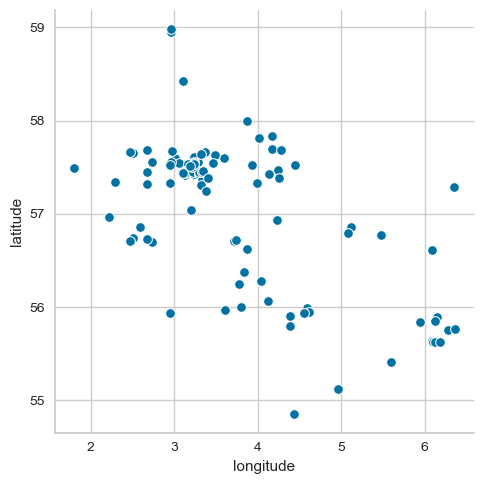

In [70]:
sns.relplot(x='longitude', y='latitude', data=geo)

In [71]:
geo.describe()

,longitude,latitude
count,109.000000,109.000000
mean,3.778303,57.034450
std,1.082548,0.806684
min,1.800000,54.860000
25%,3.110000,56.620000
50%,3.330000,57.430000
75%,4.240000,57.540000
max,6.360000,58.980000


* The k-means method does not stand when the variables have different variances. So, we have to scale the coordinates.

In [72]:
scaler = StandardScaler()
X = scaler.fit_transform(geo)
scaled_coor = pd.DataFrame(X, index=geo.index, columns=geo.columns)
scaled_coor.head()

,longitude,latitude
name,,
Aberfeldy,0.089736,-0.516143
Aberlour,-0.518112,0.529967
Ardberg,2.136006,-1.736604
Ardmore,-1.028520,0.355616
Auchentoshan,0.567663,-1.400355


* Now, we use some methods in order to select the optimal number of clusters.

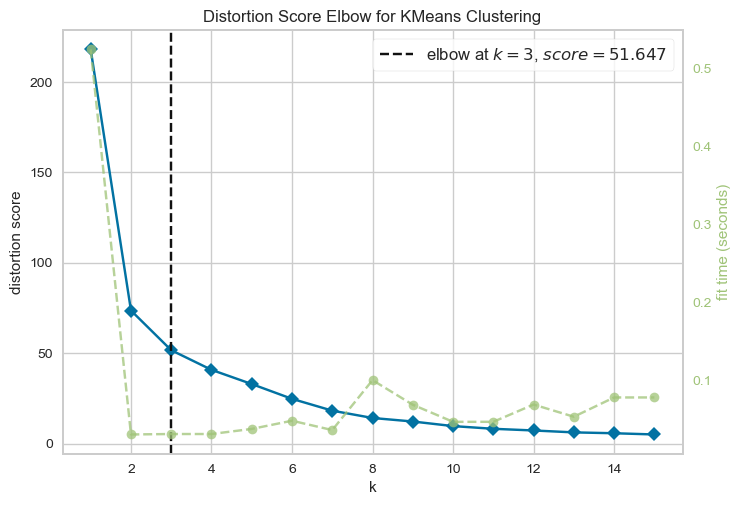

In [73]:
kmeans = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(1,16))

visualizer.fit(scaled_coor)
visualizer.show()

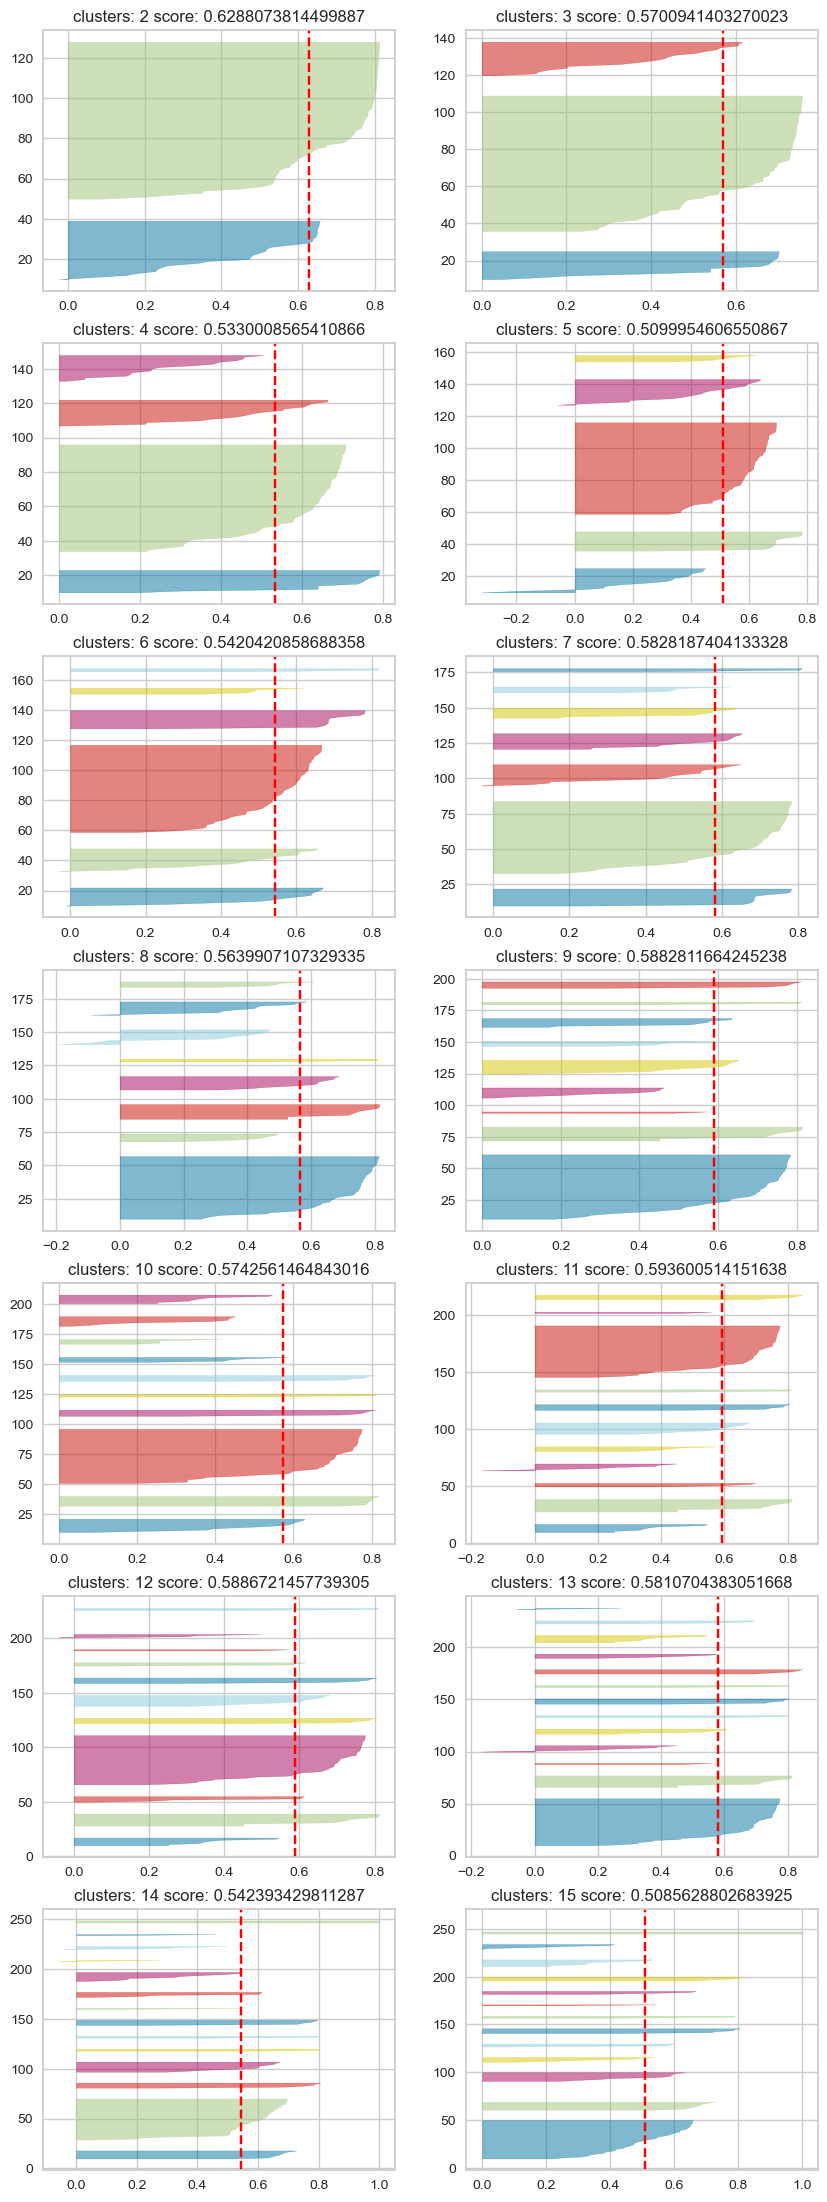

In [74]:
plt.figure(figsize=(2 * 5,  10 * 4))

scores = {}
for n_clusters in range(2, 16):
    plt.subplot(10, 2, n_clusters - 1)
    kmeans = KMeans(n_clusters, random_state=42)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(scaled_coor)
    scores[n_clusters] = visualizer.silhouette_score_
    plt.title(f'clusters: {n_clusters} score: {visualizer.silhouette_score_}')

In [75]:
sorted(scores.items(), key=lambda kv: kv[1], reverse=True)

[(2, 0.6288073814499887),
 (11, 0.593600514151638),
 (12, 0.5886721457739305),
 (9, 0.5882811664245238),
 (7, 0.5828187404133328),
 (13, 0.5810704383051668),
 (10, 0.5742561464843016),
 (3, 0.5700941403270023),
 (8, 0.5639907107329335),
 (14, 0.542393429811287),
 (6, 0.5420420858688358),
 (4, 0.5330008565410866),
 (5, 0.5099954606550867),
 (15, 0.5085628802683925)]

* We observe that the "Elbow" method does not converge with the "Silhouette Values" method by `1` cluster. The first suggests `3` clusters and the second `2` clusters. Because in the plot of the "Elbow" method the difference between `2` and `3` clusters is not very large, then we selected to cluster the coordinates into `2` groups. Also, it is worth mentioning that the latter method after `2` clusters indicates `11` and not `3`.

In [76]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(scaled_coor)
kmeans.cluster_centers_

array([[ 1.29893762, -1.34202995],
       [-0.49326745,  0.50963163]])

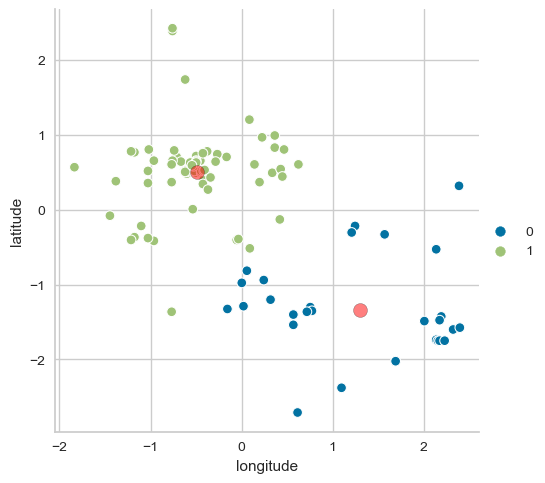

In [77]:
sns.relplot(x='longitude', y='latitude', hue=kmeans.labels_, data=scaled_coor)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', edgecolor='black', alpha=0.5, s=100)

* The above plot distinguish the two clusters that were formed and the `kmeans.cluster_centers_` array shows the coordinates of each centroid. We can infer from the plot that the 2 clusters are pretty well separated to one another.

* Now, we will investigate further the clusters were created.

In [78]:
labels = kmeans.labels_
lab = kmeans.fit_predict(scaled_coor)
np.array_equal(labels, lab)

True

In [79]:
coor = pd.DataFrame({'longitude': geo['longitude'],'latitude': geo['latitude'], 'km_cluster': labels})
coor

,longitude,latitude,km_cluster
name,,,
Aberfeldy,3.875,56.62,1
Aberlour,3.220,57.46,1
Ardberg,6.080,55.64,0
Ardmore,2.670,57.32,1
Auchentoshan,4.390,55.91,0
...,...,...,...
Glenury Royal,2.220,56.97,1
Highland Park,2.960,58.98,1
North Port,2.470,56.71,1


In [80]:
pd.set_option('display.max_rows', None)
coor2 = pd.merge(coor, cluster_scores, left_index=True, right_index=True)
print(coor2.shape)
coor2.sort_values(by=['km_cluster', 'cluster'])

(84, 5)


,longitude,latitude,km_cluster,scores,cluster
Deanston,4.040,56.280,0,69,1
Inchmurrin,4.590,55.990,0,65,1
Inverleven,4.610,55.950,0,67,1
Kinclaith,4.390,55.800,0,69,1
Ladyburn,4.960,55.125,0,57,1
Tobermory,6.080,56.610,0,67,1
Ben Nevis,5.080,56.790,0,55,1
Glengoyne,4.120,56.070,0,74,2
Glenlochy,5.120,56.860,0,70,2
Ardberg,6.080,55.640,0,85,3


In [81]:
cluster_scores.index.difference(coor2.index)

Index(['Auchentosh', 'Blair Atho', 'Bruichladd', 'Bunnahabha', 'Caperdonic',
       'Cragganmor', 'Craigellac', 'Fettercair', 'Glen  Alby', 'Glen Dever',
       'Glen Gario', 'Glen Scoti', 'Glenallach', 'Glendronac', 'Glenfarcla',
       'Glenfiddic', 'Glenglassa', 'Glenkinchi', 'Glenmorang', 'Glentauche',
       'Glenury Ro', 'Highland P', 'Longrow', 'Saint Magd', 'Tullibardi'],
      dtype='object')

In [82]:
mapping = {
    'Auchentosh': 'Auchentoshan',
    'Blair Atho': 'Blair Athol',
    'Bruichladd': 'Bruichladdich',
    'Bunnahabha': 'Bunnahabhain',
    'Caperdonic': 'Caperdonich',
    'Cragganmor': 'Cragganmore',
    'Craigellac': 'Craigellachie',
    'Fettercair': 'Fettercairn',
    'Glen  Alby': 'Glen Albyn',
    'Glen Dever': 'Glen Deveron',
    'Glen Gario': 'Glen Garioch',
    'Glen Scoti': 'Glen Scotia',
    'Glenallach': 'Glenallachie',
    'Glendronac': 'Glendronach',
    'Glenfarcla': 'Glenfarclas',
    'Glenfiddic': 'Glenfiddich',
    'Glenglassa': 'Glenglassaugh',
    'Glenkinchi': 'Glenkinchie',
    'Glenmorang': 'Glenmorangie',
    'Glentauche': 'Glentauchers',
    'Glenury Ro': 'Glenury Royal',
    'Highland P': 'Highland Park',
    'Longrow': 'Longmorn',
    'Saint Magd': 'Saint Magdalene',
    'Tullibardi': 'Tullibardine'    
}

# If no mapping provided, return x
f = lambda x: mapping.get(x, x) 
cluster_scores.index = cluster_scores.index.map(f)
data.index = data.index.map(f)

In [83]:
coor = pd.merge(coor, cluster_scores, left_index=True, right_index=True)
print(coor.shape)
coor.sort_values(by=['km_cluster', 'cluster', 'scores'])

(109, 5)


,longitude,latitude,km_cluster,scores,cluster
Ben Nevis,5.080,56.790,0,55,1
Ladyburn,4.960,55.125,0,57,1
Inchmurrin,4.590,55.990,0,65,1
Inverleven,4.610,55.950,0,67,1
Tobermory,6.080,56.610,0,67,1
Deanston,4.040,56.280,0,69,1
Kinclaith,4.390,55.800,0,69,1
Saint Magdalene,3.610,55.970,0,67,2
Glenlochy,5.120,56.860,0,70,2
Glengoyne,4.120,56.070,0,74,2


In [84]:
kmeans1 = pd.merge(data, coor[coor["km_cluster"]==0], left_index=True, right_index=True).drop(['scores'], axis=1)
kmeans1.head()

,SCORE,color_wyne,color_yellow,color_v.pale,color_pale,color_p.gold,color_gold,color_o.gold,color_f.gold,color_bronze,color_p.amber,color_amber,color_f.amber,color_red,color_sherry,NOSE_AROMA,NOSE_PEAT,NOSE_SWEET,NOSE_LIGHT,NOSE_FRESH,NOSE_DRY,NOSE_FRUIT,NOSE_GRASS,NOSE_SEA,NOSE_SHERRY,NOSE_SPICY,NOSE_RICH,BODY_soft,BODY_med,BODY_full,BODY_round,BODY_smooth,BODY_light,BODY_firm,BODY_oily,PAL_full,PAL_dry,PAL_sherry,PAL_big,PAL_light,PAL_smooth,PAL_clean,PAL_fruit,PAL_grass,PAL_smoke,PAL_sweet,PAL_spice,PAL_oil,PAL_salt,PAL_arome,FIN_full,FIN_dry,FIN_warm,FIN_big,FIN_light,FIN_smooth,FIN_clean,FIN_fruit,FIN_grass,FIN_smoke,FIN_sweet,FIN_spice,FIN_oil,FIN_salt,FIN_arome,FIN_ling,FIN_long,FIN_very,FIN_quick,DIST,REGION,DISTRICT,islay,midland,spey,east,west,north,lowland,campbell,islands,longitude,latitude,km_cluster,cluster
Ardberg,85,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,ISLAY,SOUTH,1,0,0,0,0,0,0,0,0,6.08,55.64,0,3
Auchentoshan,85,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5,LOW,WEST,0,0,0,0,0,0,1,0,0,4.39,55.91,0,3
Ben Nevis,55,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,HIGH,WEST,0,0,0,0,1,0,0,0,0,5.08,56.79,0,1
Bladnoch,85,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4,LOW,BORDERS,0,0,0,0,0,0,1,0,0,4.44,54.86,0,3
Bowmore,81,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,4,ISLAY,LOCH,1,0,0,0,0,0,0,0,0,6.28,55.75,0,3


In [85]:
kmeans2 = pd.merge(data, coor[coor["km_cluster"]==1], left_index=True, right_index=True).drop(['scores'], axis=1)
kmeans2.head()

,SCORE,color_wyne,color_yellow,color_v.pale,color_pale,color_p.gold,color_gold,color_o.gold,color_f.gold,color_bronze,color_p.amber,color_amber,color_f.amber,color_red,color_sherry,NOSE_AROMA,NOSE_PEAT,NOSE_SWEET,NOSE_LIGHT,NOSE_FRESH,NOSE_DRY,NOSE_FRUIT,NOSE_GRASS,NOSE_SEA,NOSE_SHERRY,NOSE_SPICY,NOSE_RICH,BODY_soft,BODY_med,BODY_full,BODY_round,BODY_smooth,BODY_light,BODY_firm,BODY_oily,PAL_full,PAL_dry,PAL_sherry,PAL_big,PAL_light,PAL_smooth,PAL_clean,PAL_fruit,PAL_grass,PAL_smoke,PAL_sweet,PAL_spice,PAL_oil,PAL_salt,PAL_arome,FIN_full,FIN_dry,FIN_warm,FIN_big,FIN_light,FIN_smooth,FIN_clean,FIN_fruit,FIN_grass,FIN_smoke,FIN_sweet,FIN_spice,FIN_oil,FIN_salt,FIN_arome,FIN_ling,FIN_long,FIN_very,FIN_quick,DIST,REGION,DISTRICT,islay,midland,spey,east,west,north,lowland,campbell,islands,longitude,latitude,km_cluster,cluster
Aberfeldy,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,2,HIGH,MIDLAND,0,1,0,0,0,0,0,0,0,3.875,56.62,1,2
Aberlour,83,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,4,HIGH,SPEY,0,0,1,0,0,0,0,0,0,3.220,57.46,1,5
Ardmore,66,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,HIGH,SPEY,0,0,1,0,0,0,0,0,0,2.670,57.32,1,5
Aultmore,75,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,HIGH,SPEY,0,0,1,0,0,0,0,0,0,3.010,57.60,1,1
Balblair,76,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,3,HIGH,NORTH,0,0,0,0,0,1,0,0,0,4.170,57.83,1,1


In [86]:
print('- Cluster No1 means:\n', kmeans1.mean()[kmeans1.mean()>0.5])
print()
print('- Cluster No2 means: \n', kmeans2.mean()[kmeans2.mean()>0.5])

- Cluster No1 means:
 SCORE         75.931034
NOSE_PEAT      0.517241
BODY_light     0.655172
PAL_sweet      0.620690
DIST           3.275862
longitude      5.163448
latitude      55.975690
cluster        2.793103
dtype: float64

- Cluster No2 means: 
 SCORE         75.756098
BODY_med       0.658537
PAL_sweet      0.792683
DIST           3.195122
spey           0.707317
longitude      3.246524
latitude      57.447927
km_cluster     1.000000
cluster        3.341463
dtype: float64


* We see that although the clustering was performed pretty well, as we mentioned before from the plot, the size of each cluster differs a lot. Also, we located many typos between the two files. So, we had to ameliorate this situation to compare the first clustering with the second with as big accuracy as we can.

* Later, we investigated each records of the clusters to see what values they contain and what the characteristics that prevail in each one of them. So, we took the means of the new-formed clusters and we conclude that if we observe them, they look like one another very much. An average whisky in both clusters has score near to 76, come from a distillery with score near to 3 and has a sweet palate. The average whisky in the first cluster has also a light body, peat nose and its distillery located more east and north than in the second cluster. The average whisky in the second cluster has medium body and belongs to the spey region of Scotland.

In [87]:
coor.pivot_table(index='km_cluster', columns='cluster', aggfunc='size').fillna(0).astype('int64')

cluster,1,2,3,4,5
km_cluster,,,,,
0,7,3,11,5,3
1,11,19,11,10,29


* From the above table we can assume that because of the different size and number of groups in each clustering, we cannot easily compare the two methods, neither can we extract a conclusion on whether they are related. Roughly, we can assume that the whiskies in 3rd group of the first clustering is equally separated in the second case.

* We have also to mention that we have different results from what the authors suggest, because we used different approaches. The authors used a spatially constrained method of the k-means in order to take into consideration the 68 characteristics of scotch whiskies, instead of a plain k-means method that we used earlier. They aimed to divide the area into organoleptic regions depending on how each whisky was produced. So, in this method the distilleries were clustered only if they formed a continuous area of the map based on geographic coordinates of the distilleries. That is why, even if two or more whiskies had the same features, then they were not clustered together if they belonged to another regions of Scotland.
* To clarify, they had been done some efforts to do geographical depiction of the clusters, like the authors did, but we come across two main problems:
    1. for an unexplained reason, it was unable to import some packages like for example the `geopandas` and
    2. the coordinates were given were probably wrong, because when they loaded into a static map (like picture in the `cartopy` package) they pointed a place in the Scandinavia, far away from the Scotland. 